In [1]:
import json

with open("./params.json", mode = "r", encoding = "utf-8") as f:
    data = json.load(f)
    model_path = data["model_path"]
    dataset_path_train = data["dataset_path"]["train"]
    dataset_path_test = data["dataset_path"]["test"]
    num_single_sample_timesteps = data["num_single_sample_timesteps"]
    input_window_length = data["input_window_length"]
    label_window_length = data["label_window_length"]
    input_features = data["input_features"]
    label_features = data["label_features"]

    # Usually window_stride = 1 since we want to check each input window
    window_stride = 20
    seed_val = 0

In [2]:
import torch
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

torch.manual_seed(seed_val)
random.seed(seed_val)
np.random.seed(seed_val)

In [3]:
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from utils.pipeline.Model import TimeSeriesHuggingFaceTransformer
from utils.pipeline.Data import get_mean_std_respected_temporal, WindowedIterableDataset
from utils.pipeline.Run import autoregress

/users/labnet5/gr5/abahari/Documents/Thesis/src/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# stats = get_mean_std_respected_temporal(
#     dataset_path = dataset_path_train,
#     cols = input_features
# )

input_stats = get_mean_std_respected_temporal(
    dataset_path = dataset_path_train,
    cols = input_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    input_window_len = input_window_length,
    label_window_len = label_window_length,
    window_stride = window_stride
)
if(set(input_features) == set(label_features)):
    output_stats = input_stats
else:
    output_stats = get_mean_std_respected_temporal(
        dataset_path = dataset_path_train,
        cols = label_features,
        num_single_sample_timesteps = num_single_sample_timesteps,
        input_window_len = input_window_length,
        label_window_len = label_window_length,
        window_stride = window_stride
    )

df_test = WindowedIterableDataset(
    dataset_path = dataset_path_test,
    input_stats = input_stats,
    label_stats = output_stats,
    input_features = input_features,
    label_features = label_features,
    num_single_sample_timesteps = num_single_sample_timesteps,
    stride = window_stride,
    input_window_length = input_window_length,
    label_window_length = label_window_length,
    inference = True
)

data_loader_test = DataLoader(
    df_test,
    batch_size = 1,    # One windowed datapoint at a time
    pin_memory = True
)

## Prediction

In [5]:
# model = torch.load(model_path, weights_only = False).to(device)
# model.eval()

model_paths = [
    "./models/transformer-100-50-10-0.pt",
    "./models/transformer-100-50-10-5.pt",
    "./models/transformer-100-50-10-10.pt",
    "./models/transformer-100-50-10-15.pt",
    "./models/transformer-100-50-10-20.pt"
]

0it [00:00, ?it/s]

3096it [00:01, 5095.28it/s, single_test_loss=0.230654]

tensor(0.3235)
tensor(0.3395)
tensor(0.3703)
tensor(0.3448)
tensor(0.2949)


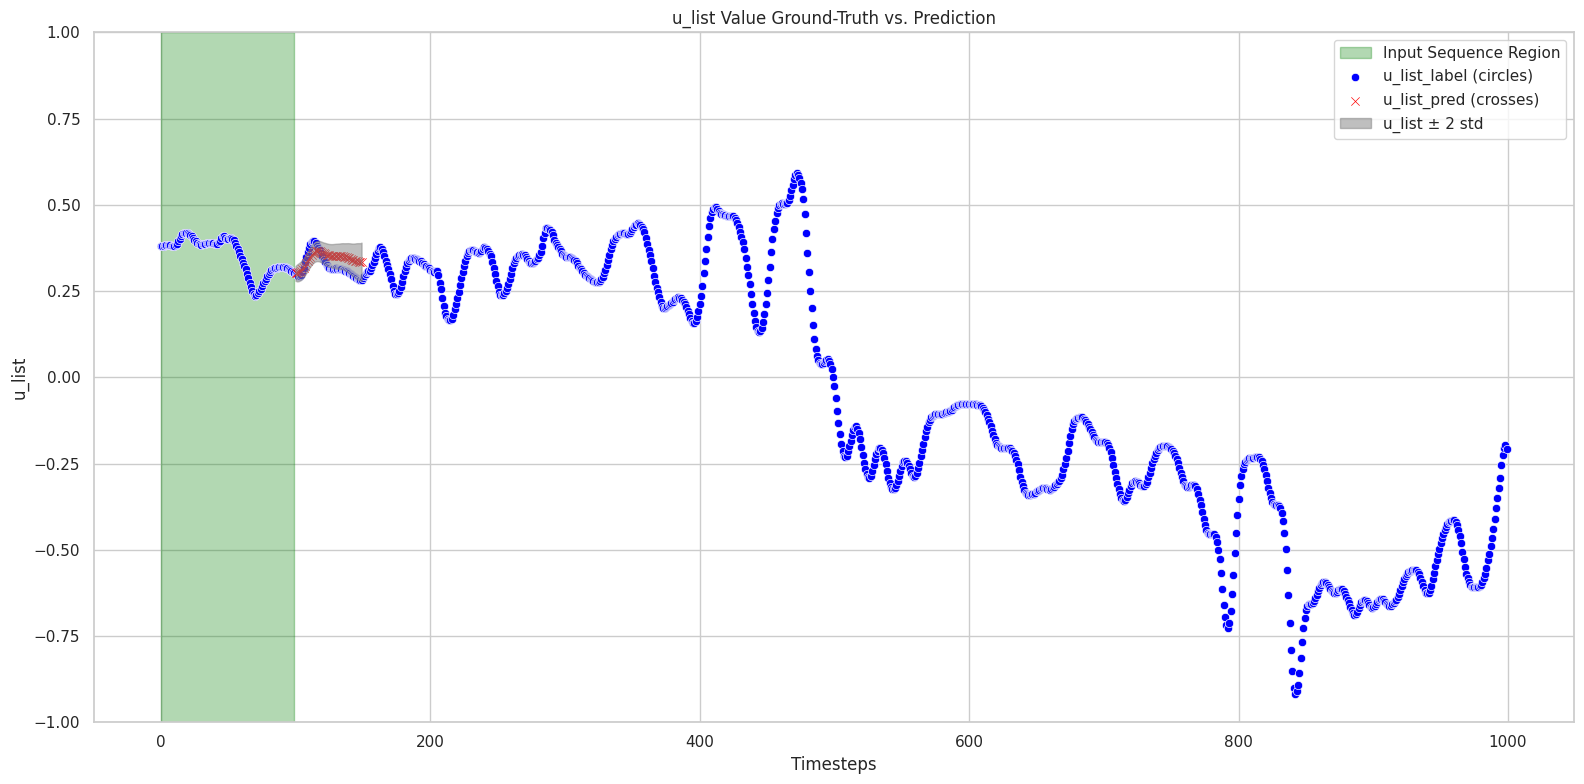

3096it [00:02, 5095.28it/s, single_test_loss=0.265754]

tensor(0.3252)
tensor(0.3572)
tensor(0.3762)
tensor(0.3866)
tensor(0.3217)


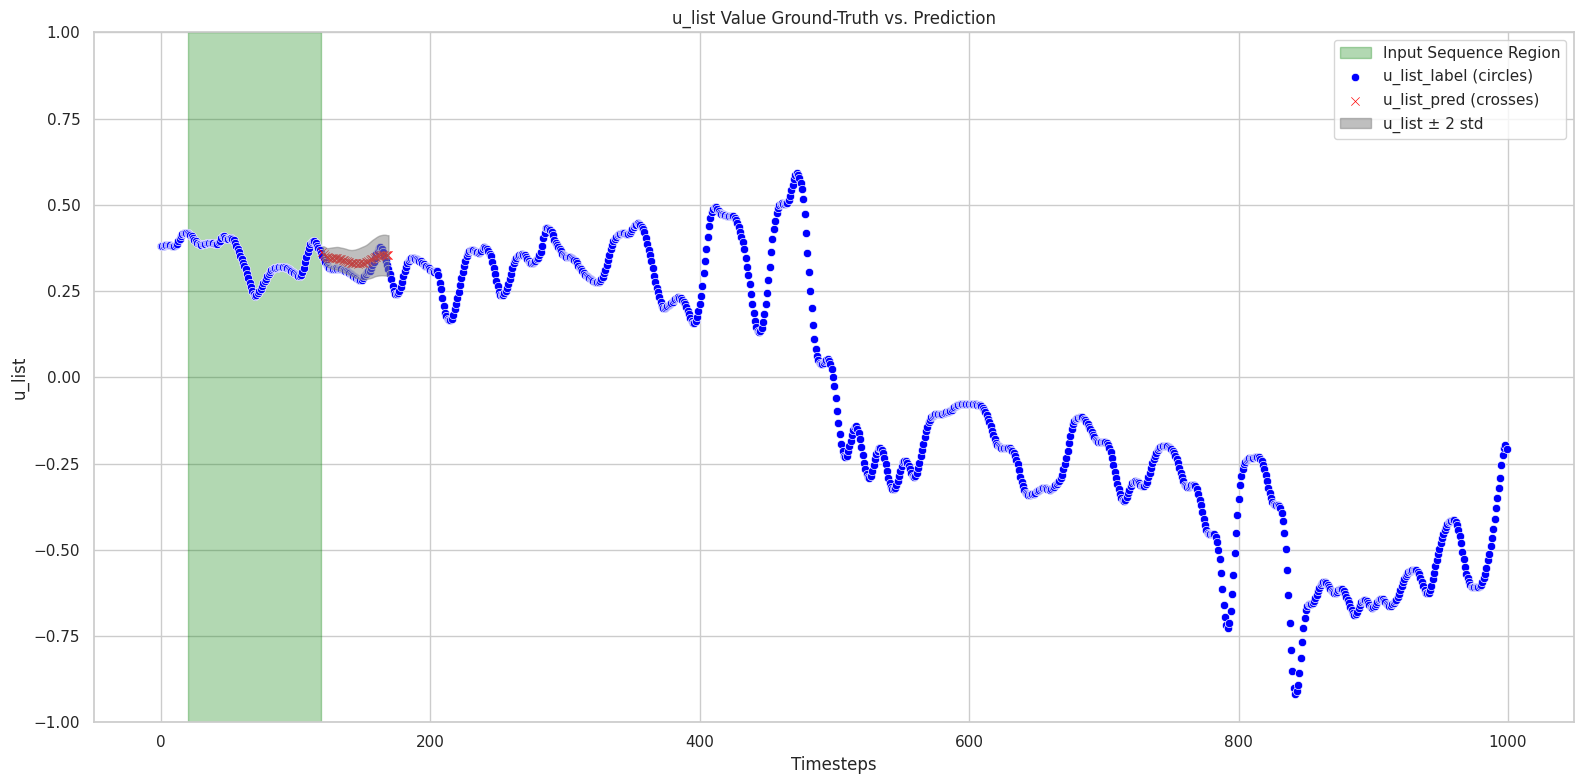

3096it [00:03, 5095.28it/s, single_test_loss=0.483894]

tensor(0.3267)
tensor(0.3702)
tensor(0.3592)
tensor(0.4053)
tensor(0.3082)


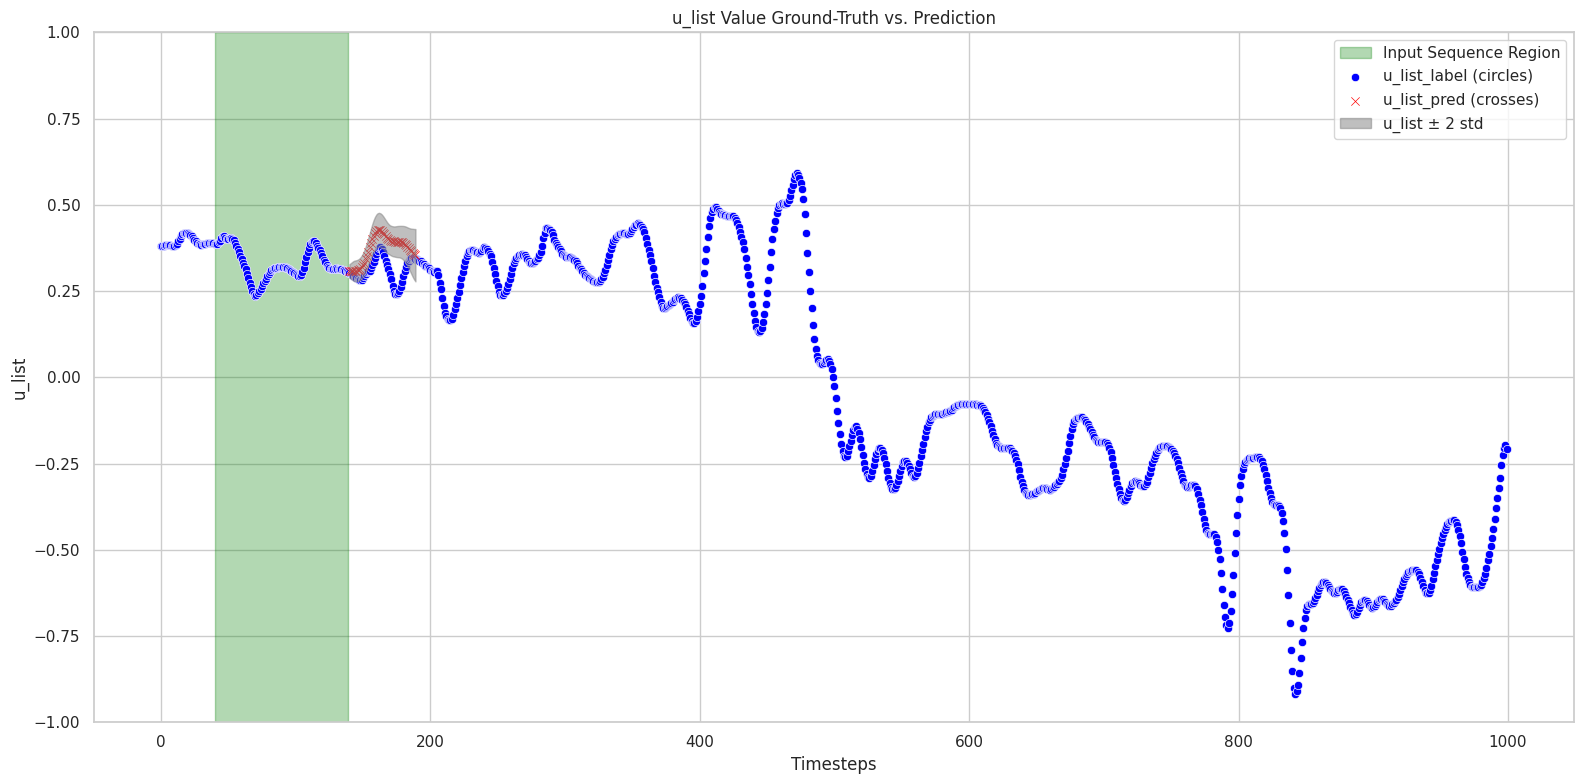

3096it [00:04, 5095.28it/s, single_test_loss=0.597642]

tensor(0.3215)
tensor(0.3768)
tensor(0.3767)
tensor(0.4284)
tensor(0.3071)


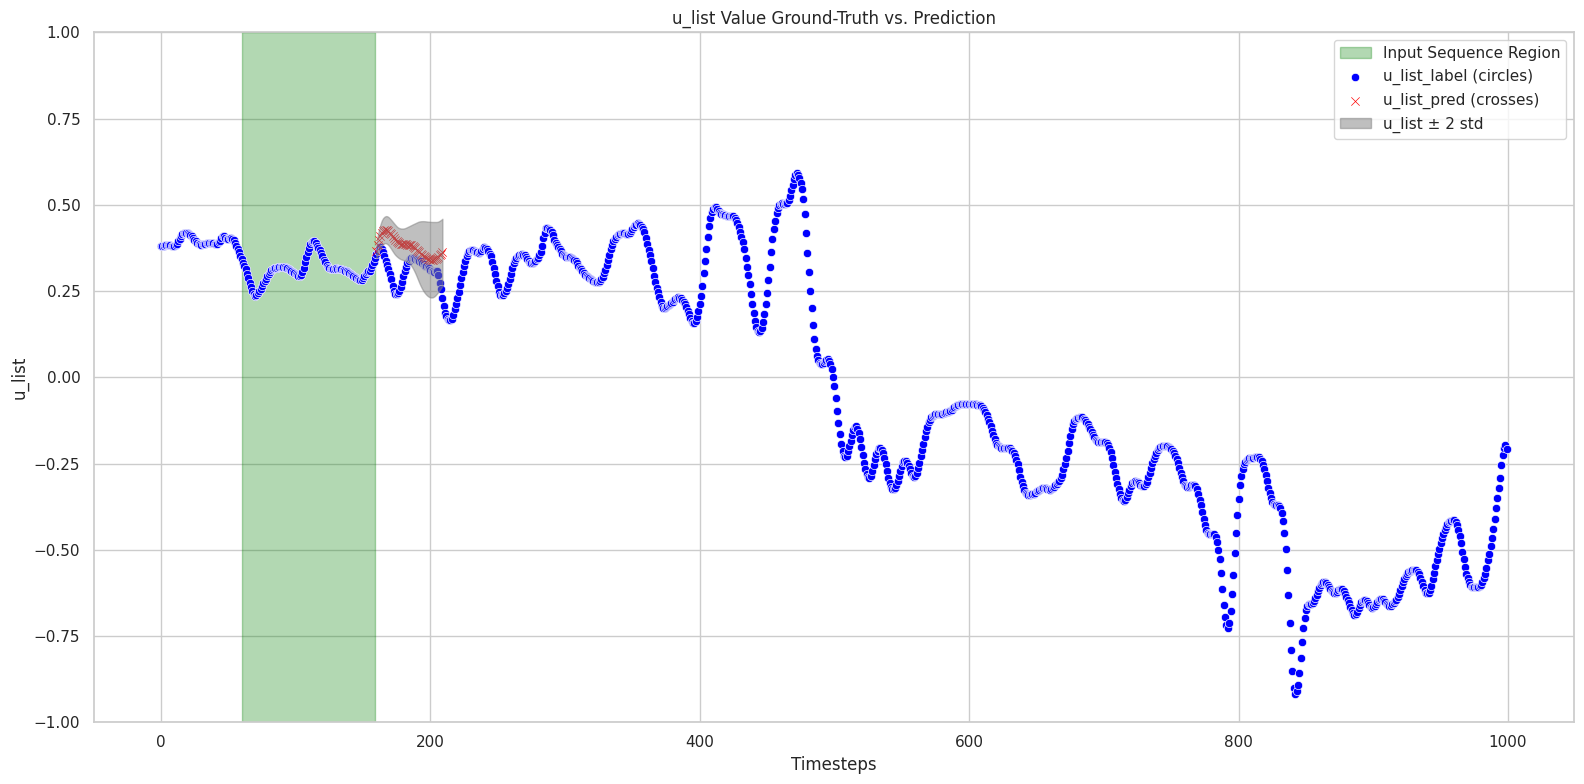

3096it [00:05, 5095.28it/s, single_test_loss=0.316190]

tensor(0.3432)
tensor(0.3075)
tensor(0.3583)
tensor(0.3493)
tensor(0.3188)


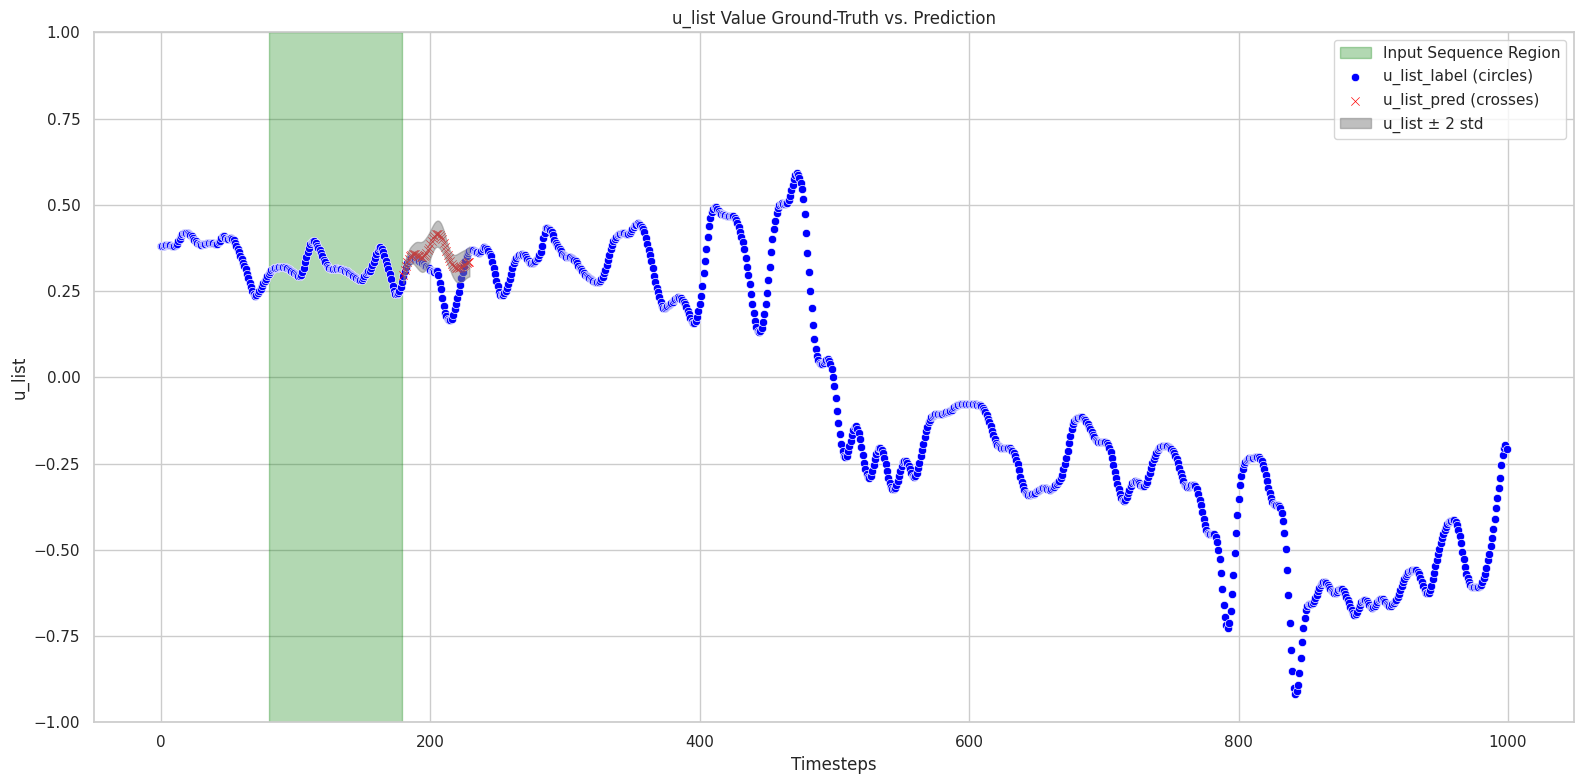

3096it [00:06, 5095.28it/s, single_test_loss=0.489308]

tensor(0.3270)
tensor(0.3509)
tensor(0.3735)
tensor(0.3661)
tensor(0.3124)


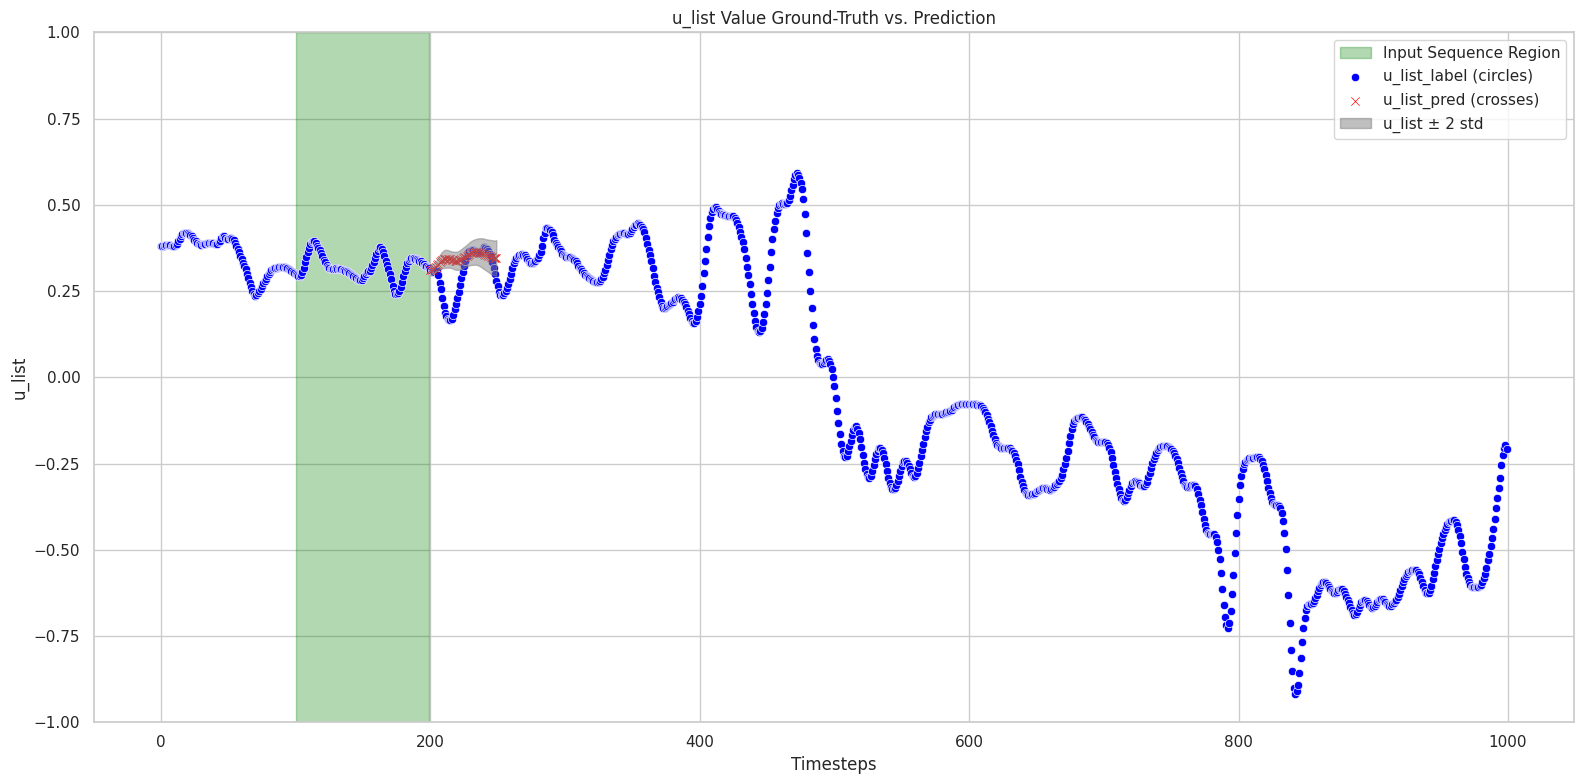

3096it [00:07, 5095.28it/s, single_test_loss=0.181454]

tensor(0.3010)
tensor(0.3091)
tensor(0.3265)
tensor(0.3567)
tensor(0.2482)


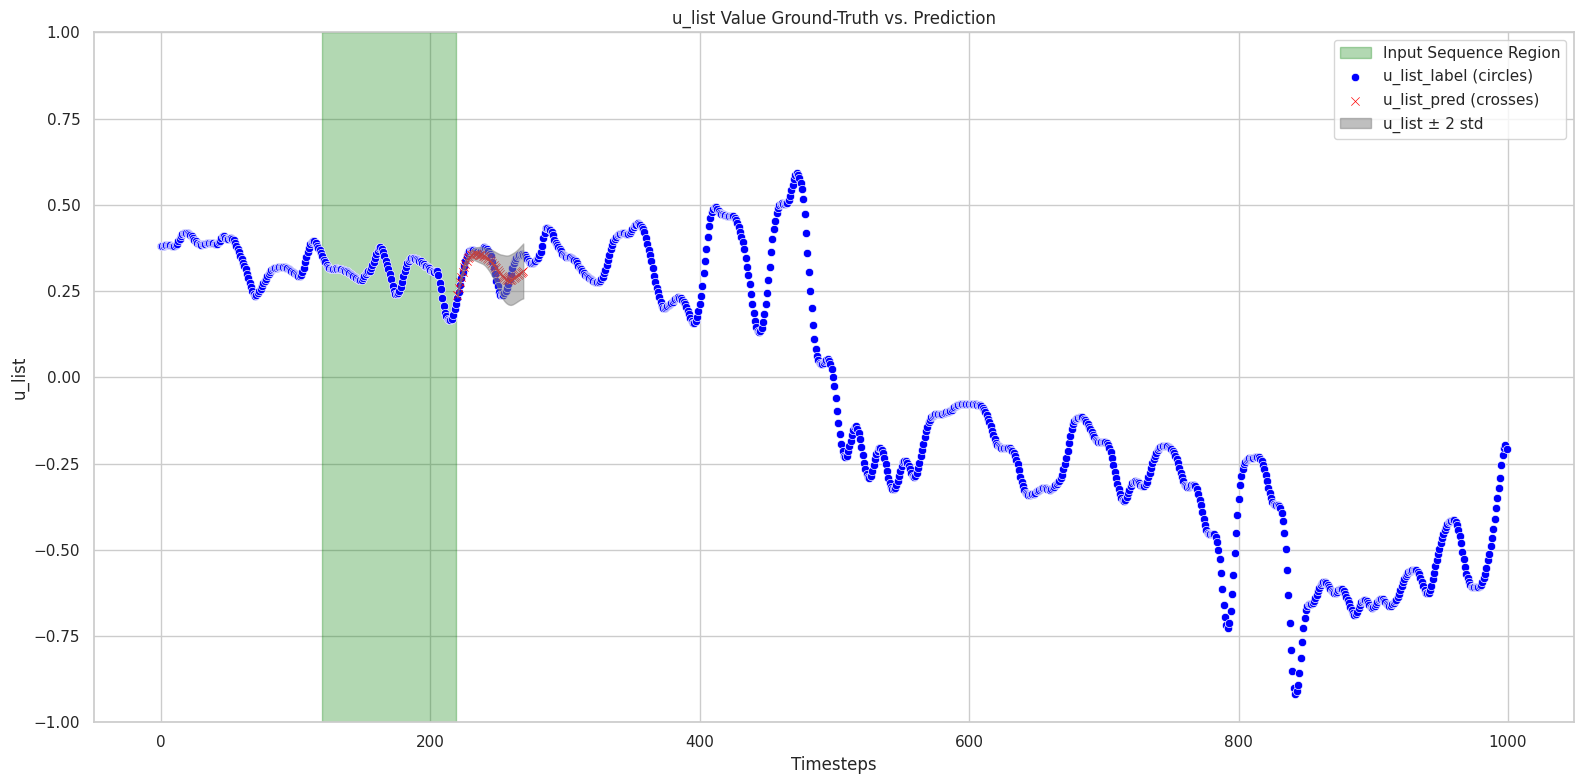

3096it [00:09, 5095.28it/s, single_test_loss=0.572551]

tensor(0.2524)
tensor(0.3046)
tensor(0.2639)
tensor(0.3644)
tensor(0.2168)


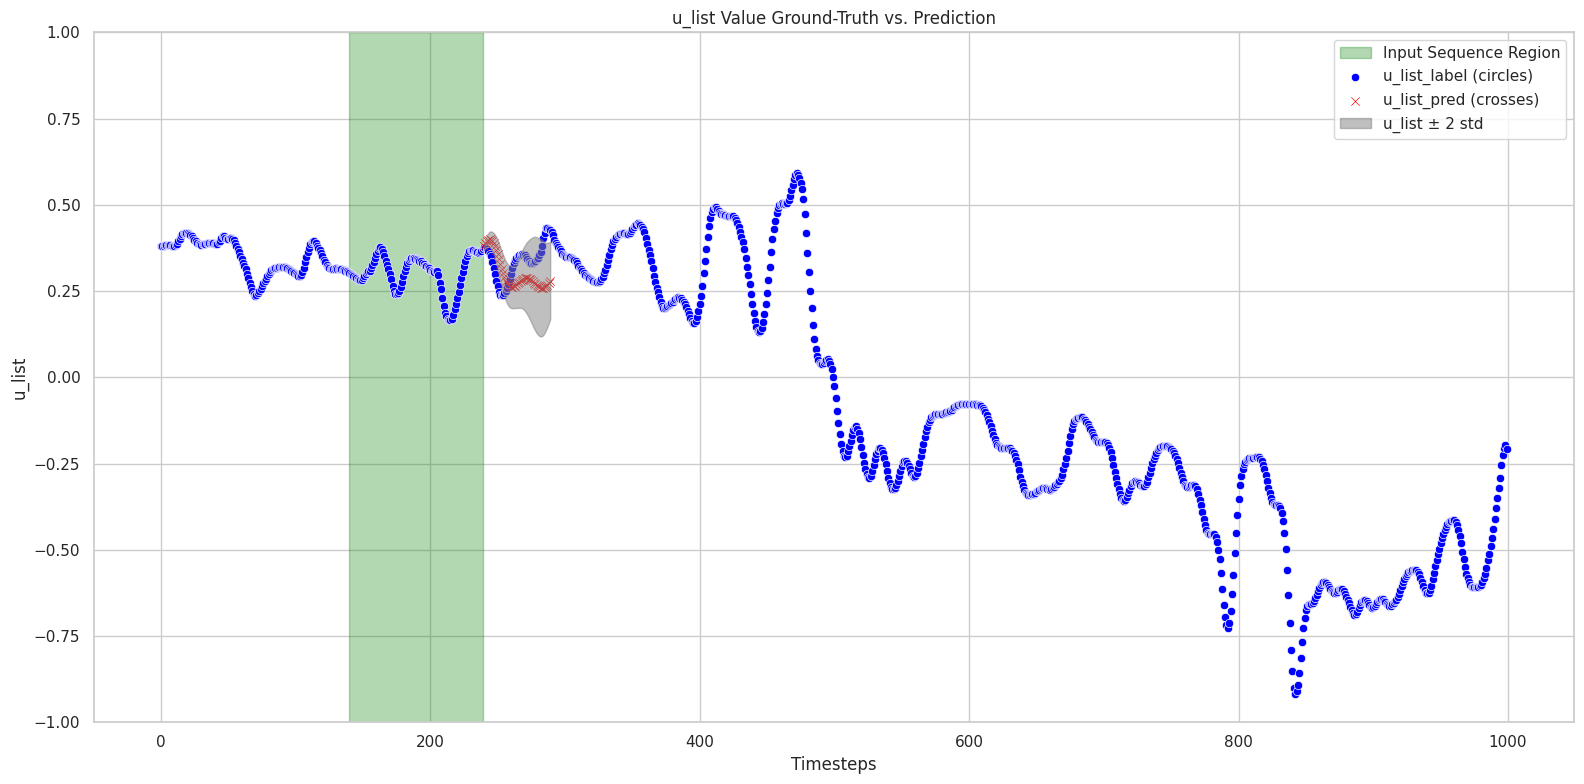

3096it [00:10, 5095.28it/s, single_test_loss=0.314362]

tensor(0.3007)
tensor(0.3137)
tensor(0.3405)
tensor(0.3541)
tensor(0.2742)


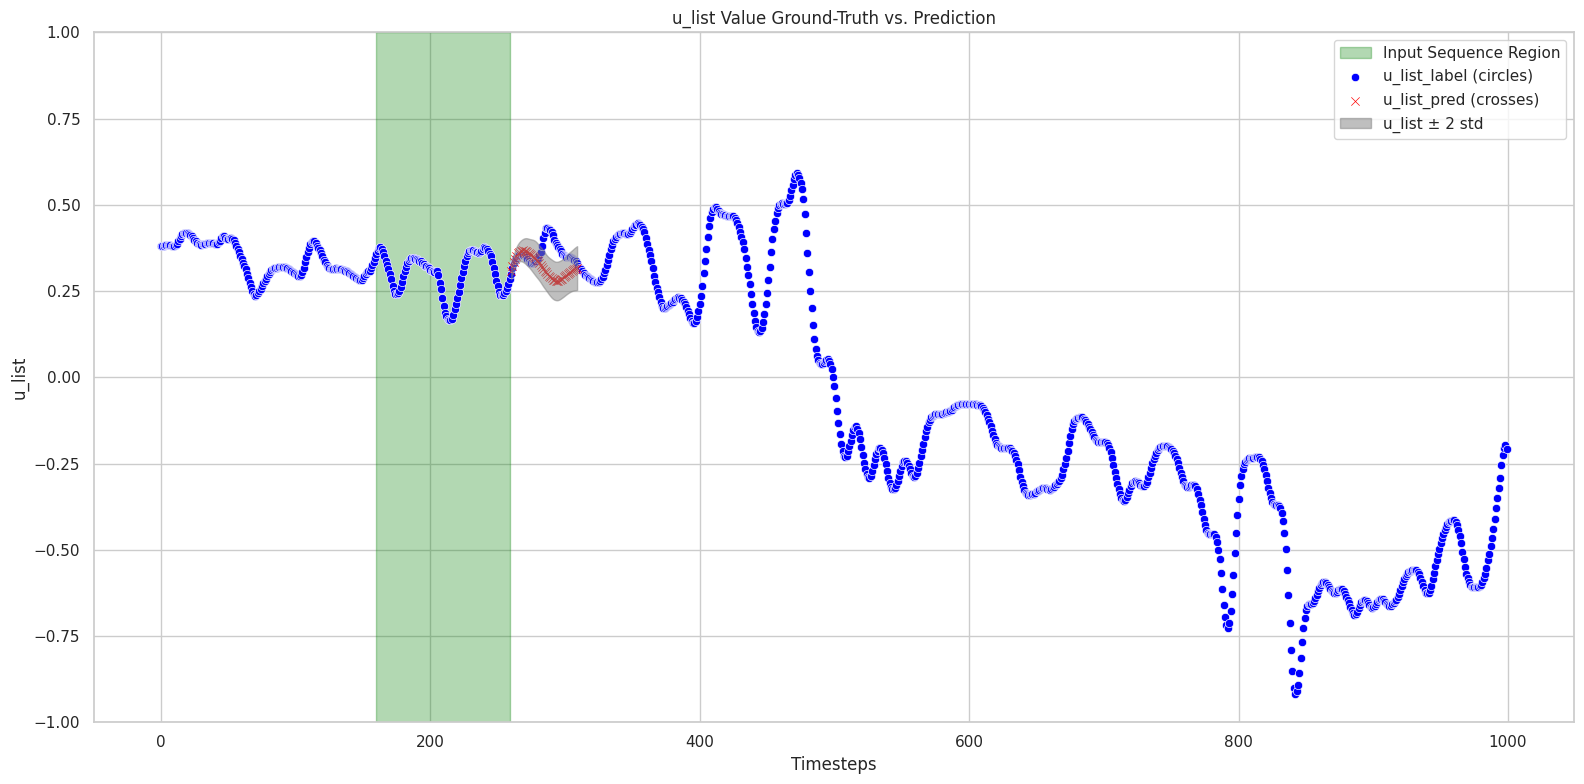

3096it [00:11, 5095.28it/s, single_test_loss=0.251045]

tensor(0.2944)
tensor(0.2918)
tensor(0.3382)
tensor(0.3114)
tensor(0.2654)


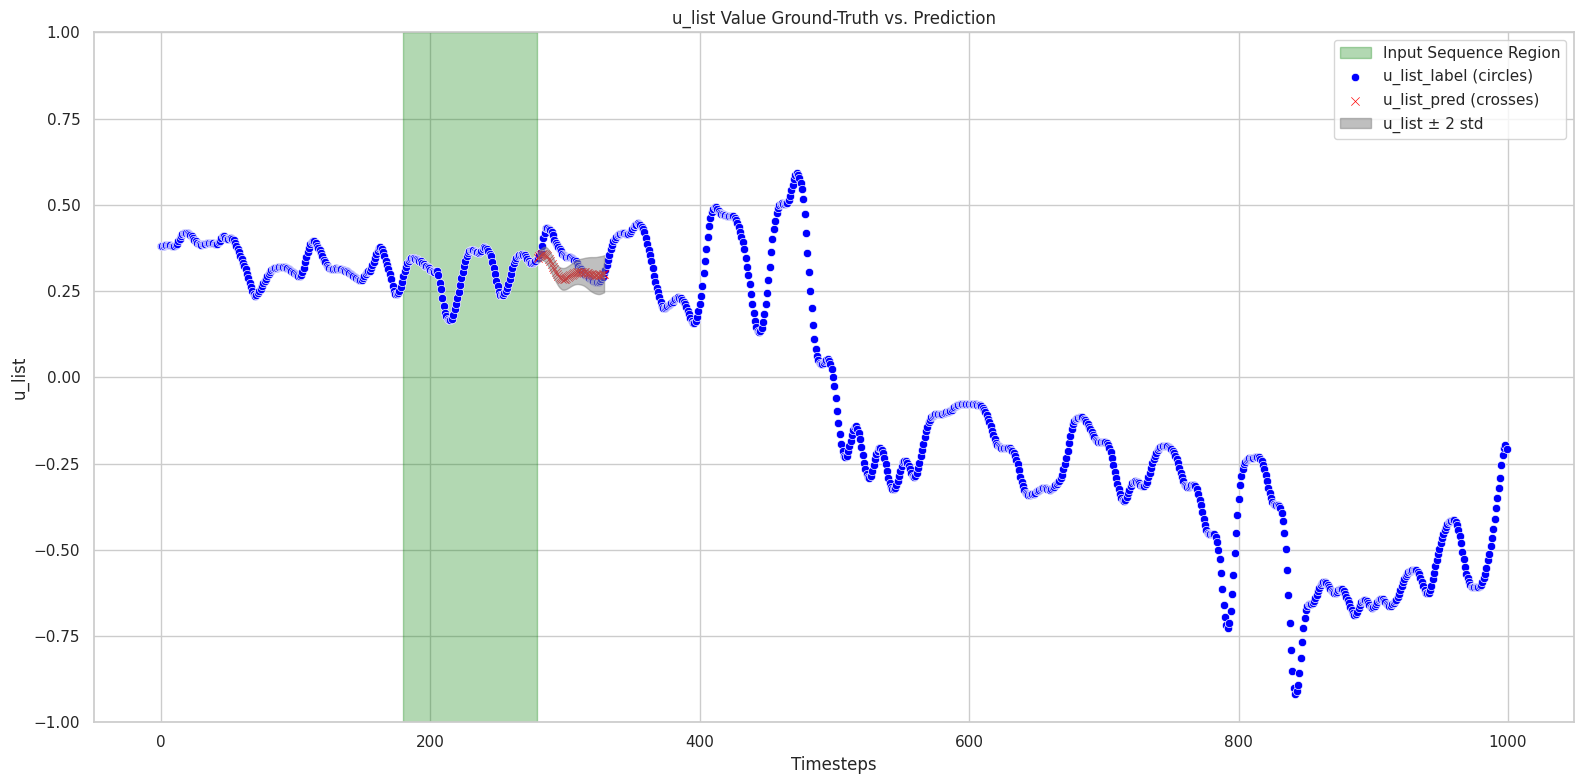

3096it [00:11, 5095.28it/s, single_test_loss=0.139431]

tensor(0.3281)
tensor(0.3717)
tensor(0.3775)
tensor(0.3972)
tensor(0.3461)


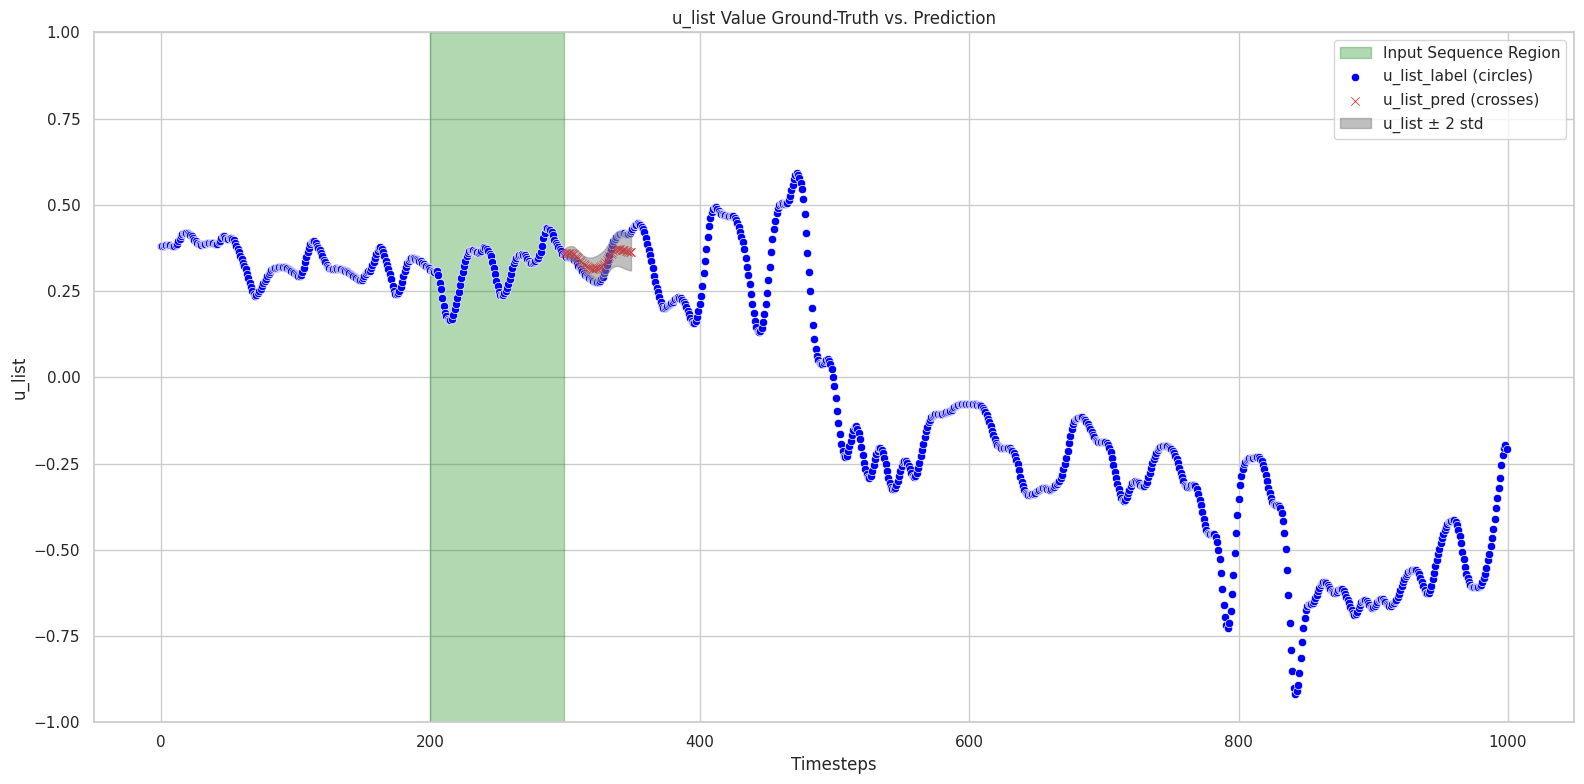

3096it [00:12, 5095.28it/s, single_test_loss=0.417642]

tensor(0.3152)
tensor(0.3524)
tensor(0.3399)
tensor(0.3686)
tensor(0.3088)


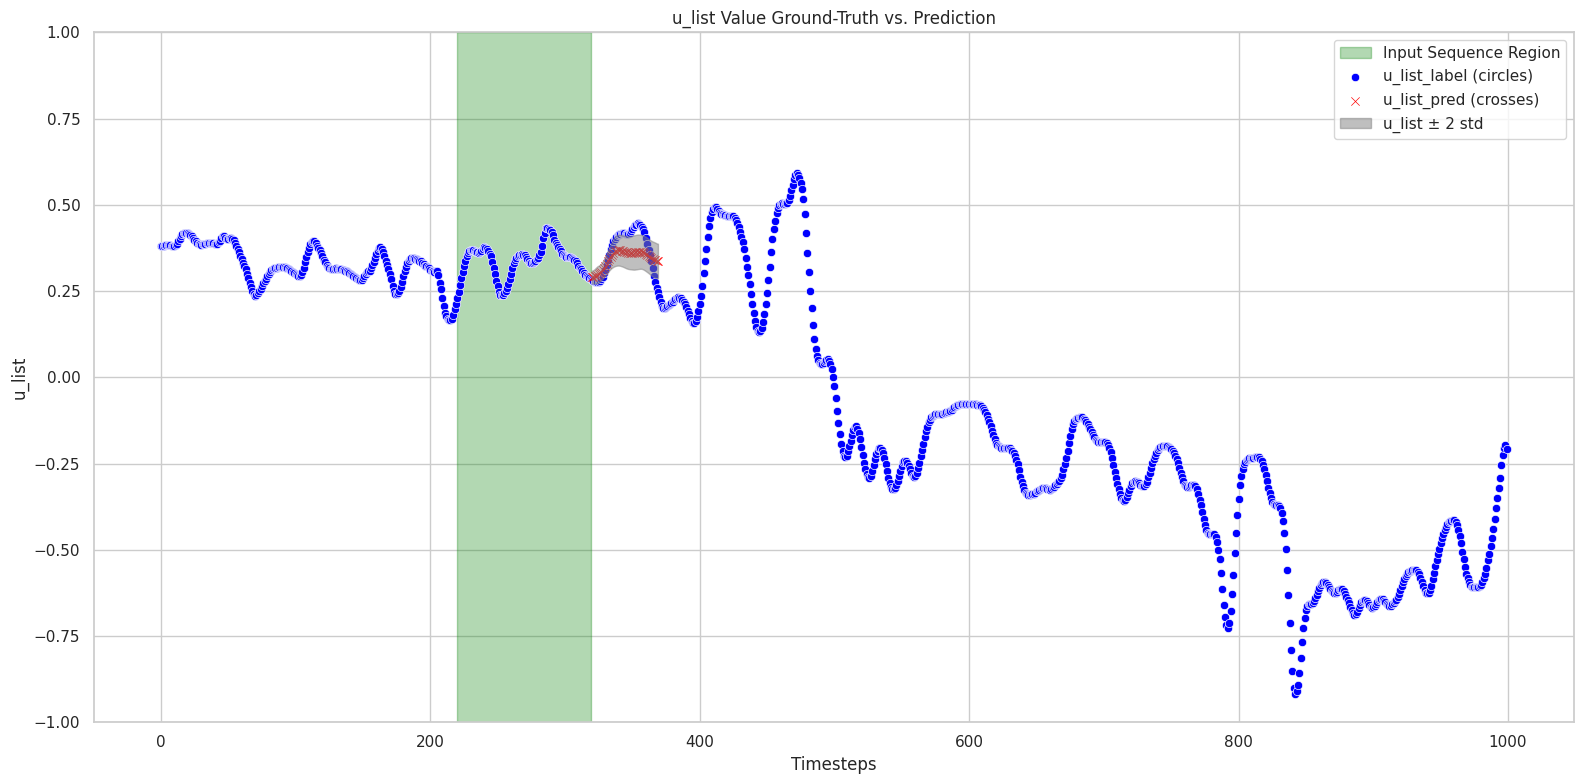

3096it [00:13, 5095.28it/s, single_test_loss=0.228593]

tensor(0.3496)
tensor(0.3556)
tensor(0.3756)
tensor(0.3922)
tensor(0.2975)


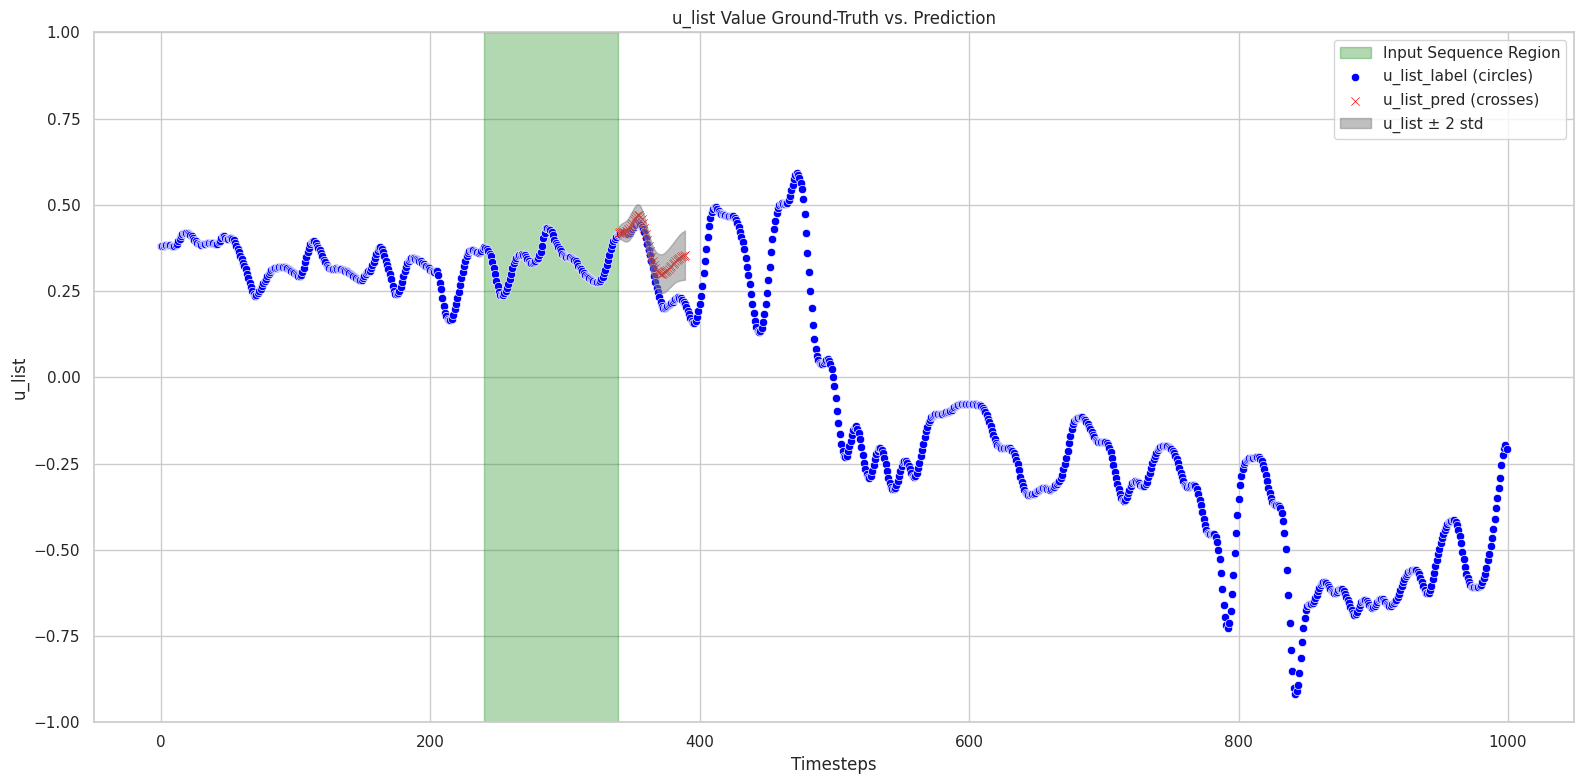

3096it [00:14, 5095.28it/s, single_test_loss=0.357891]

tensor(0.2831)
tensor(0.3178)
tensor(0.3317)
tensor(0.3378)
tensor(0.2811)


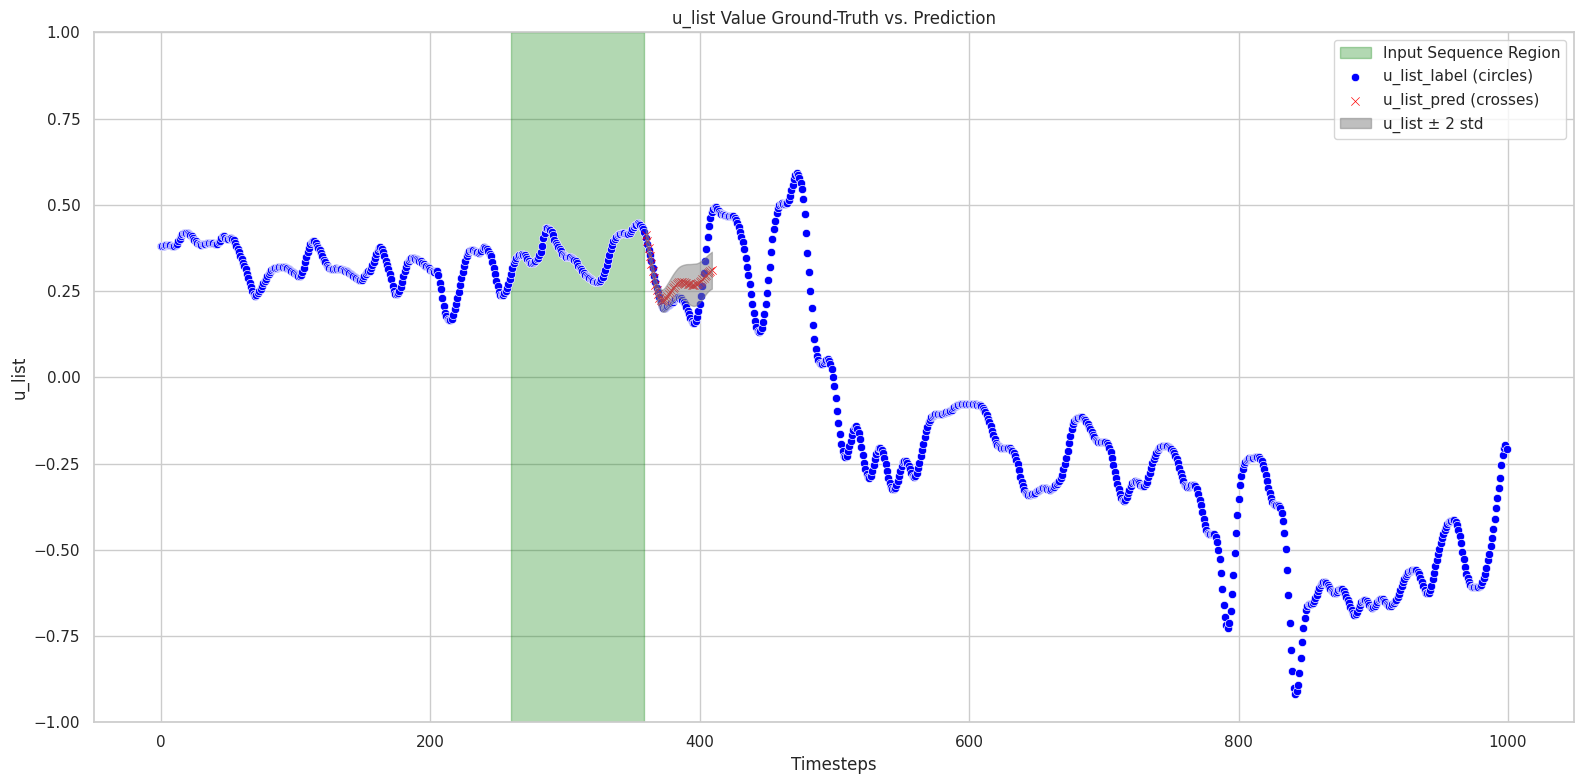

3096it [00:15, 5095.28it/s, single_test_loss=0.406276]

tensor(0.2699)
tensor(0.3151)
tensor(0.3048)
tensor(0.3285)
tensor(0.2993)


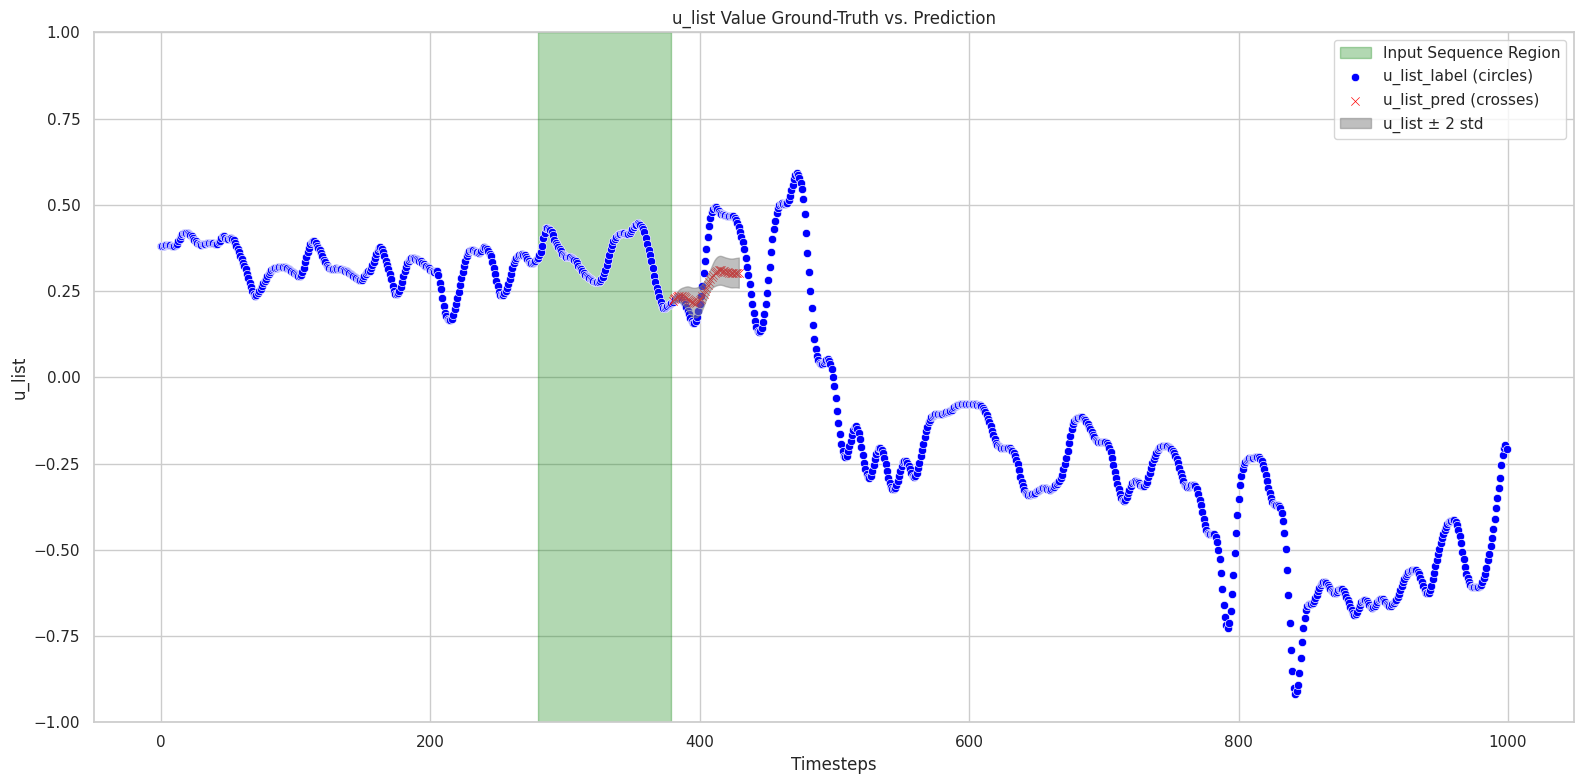

3096it [00:16, 5095.28it/s, single_test_loss=0.179475]

tensor(0.3175)
tensor(0.2502)
tensor(0.3458)
tensor(0.4629)
tensor(0.2407)


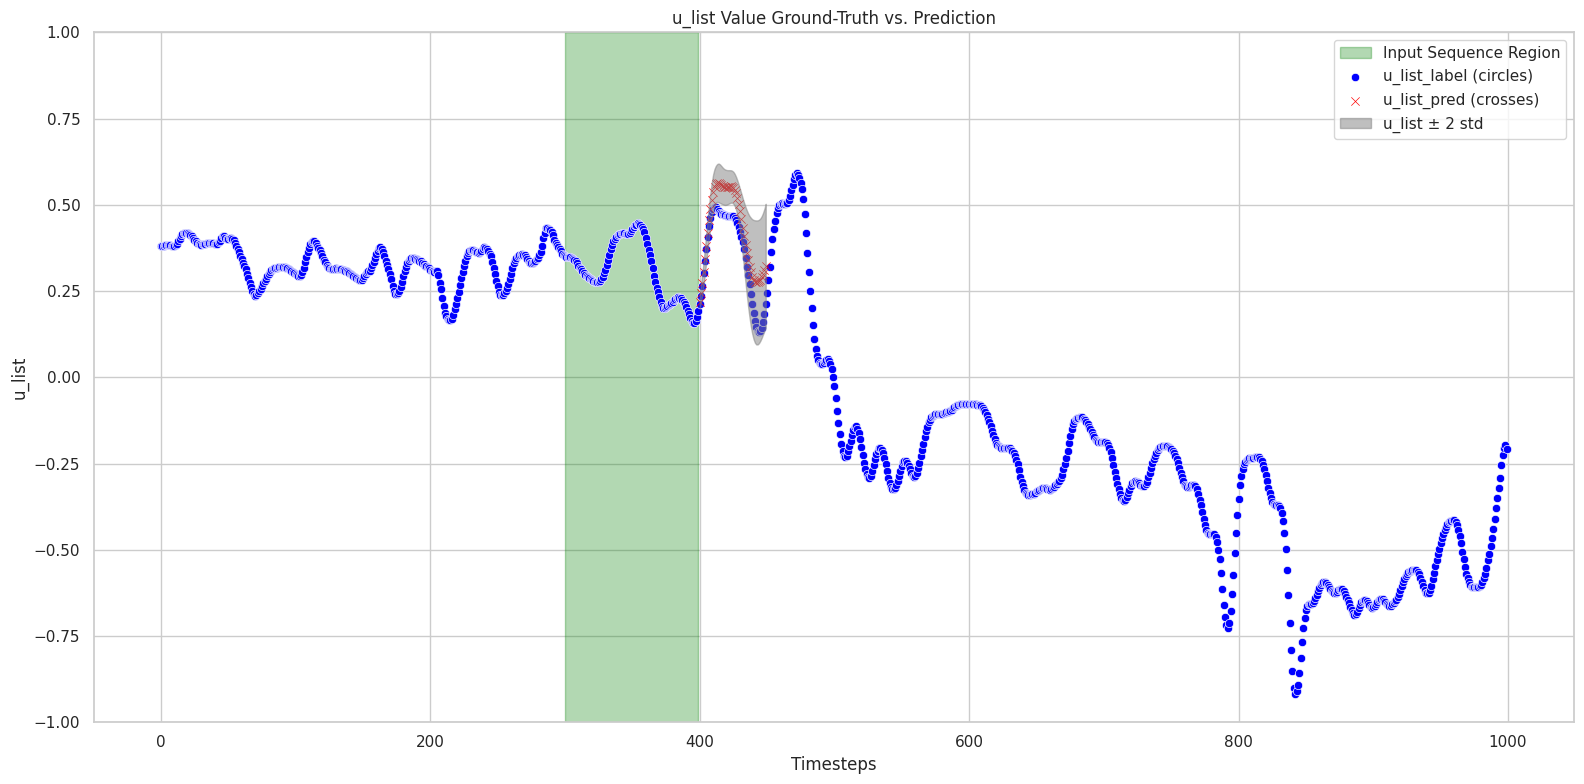

3096it [00:17, 5095.28it/s, single_test_loss=0.597315]

tensor(0.3675)
tensor(0.4262)
tensor(0.4119)
tensor(0.4493)
tensor(0.3557)


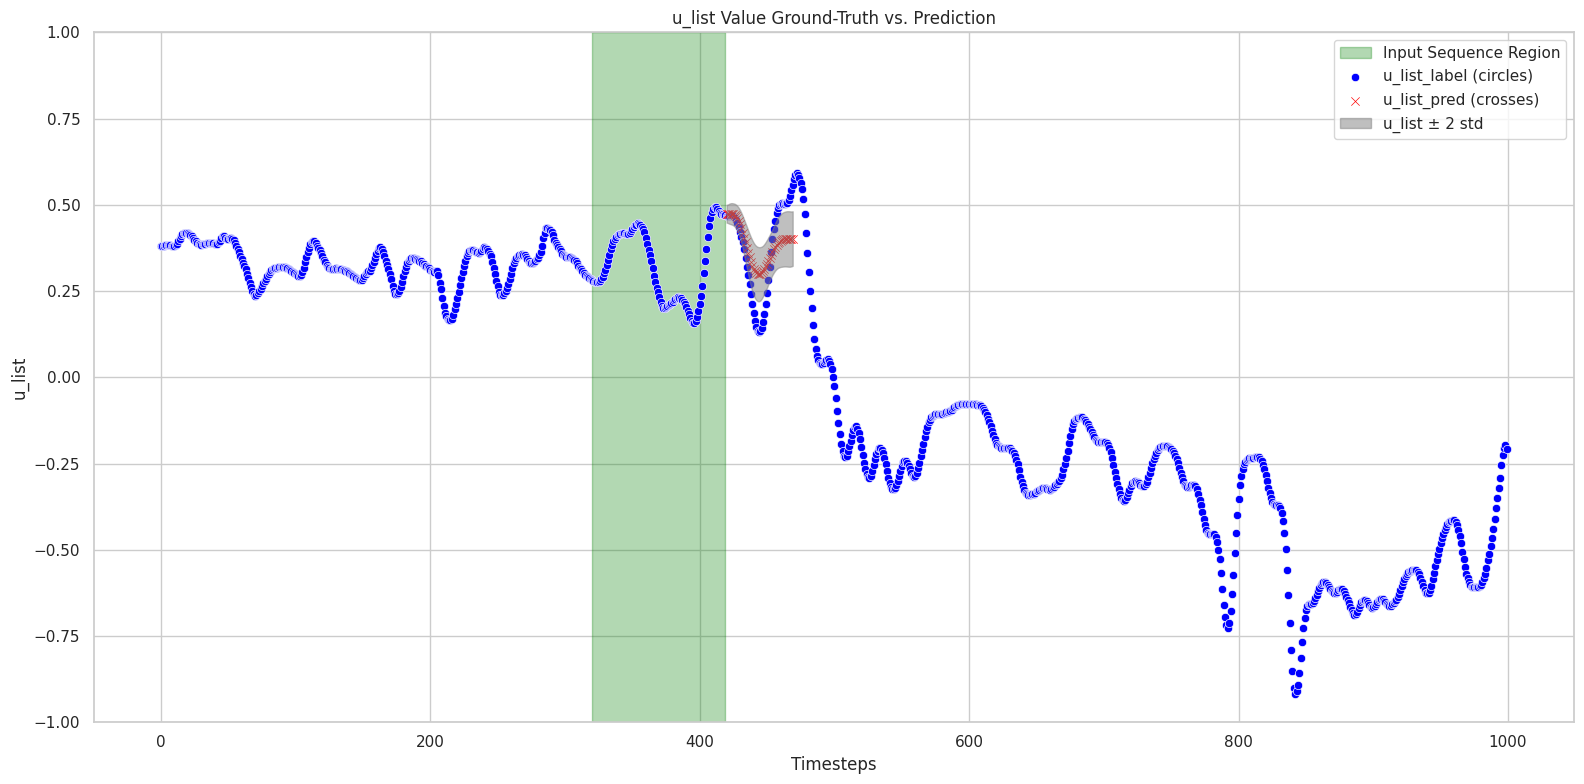

3096it [00:18, 5095.28it/s, single_test_loss=0.540895]

tensor(0.3414)
tensor(0.3178)
tensor(0.3819)
tensor(0.2778)
tensor(0.3198)


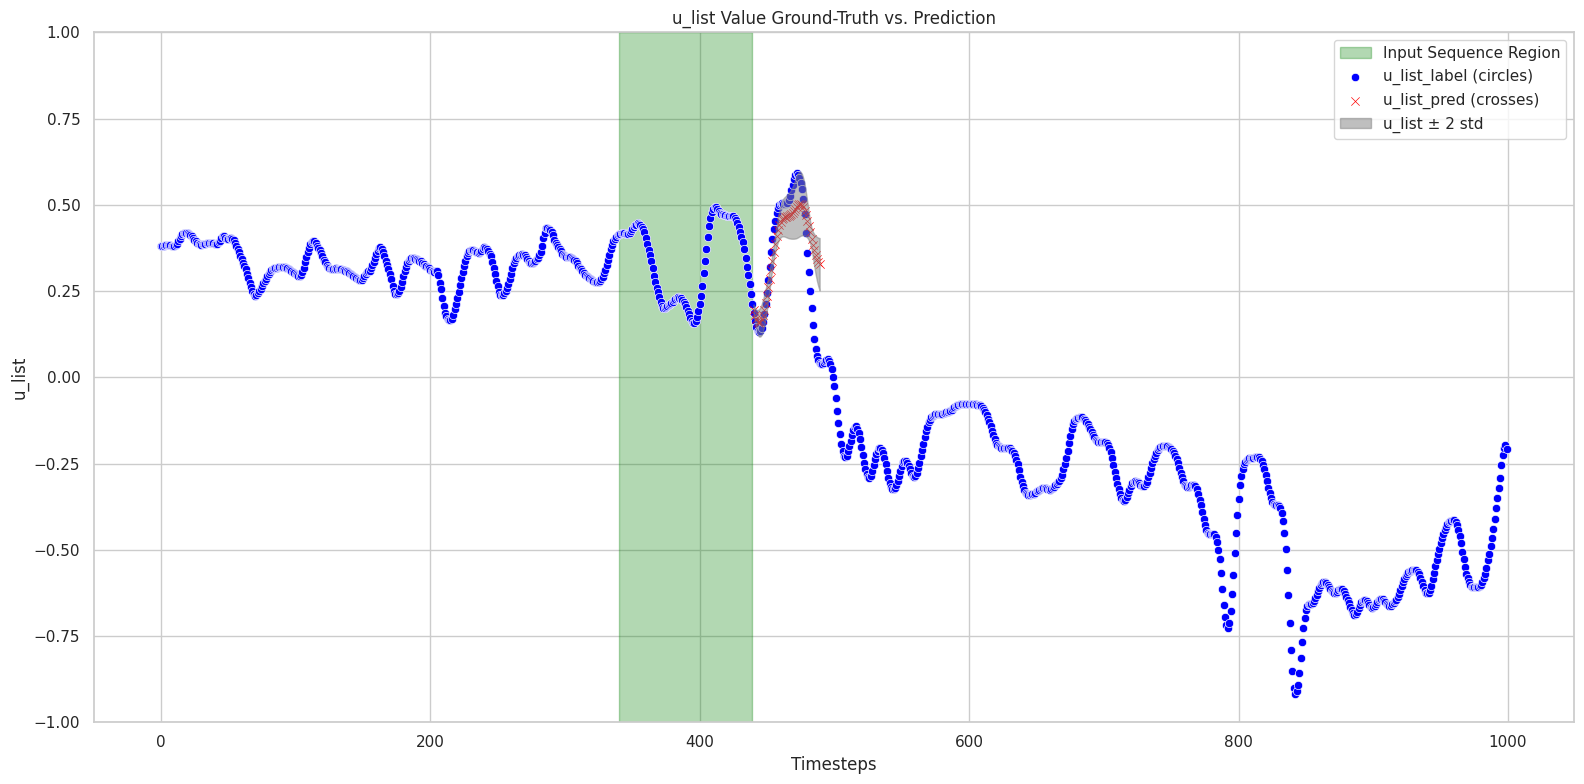

3096it [00:19, 5095.28it/s, single_test_loss=0.572658]

tensor(0.2561)
tensor(0.3776)
tensor(0.2640)
tensor(0.3439)
tensor(0.1505)


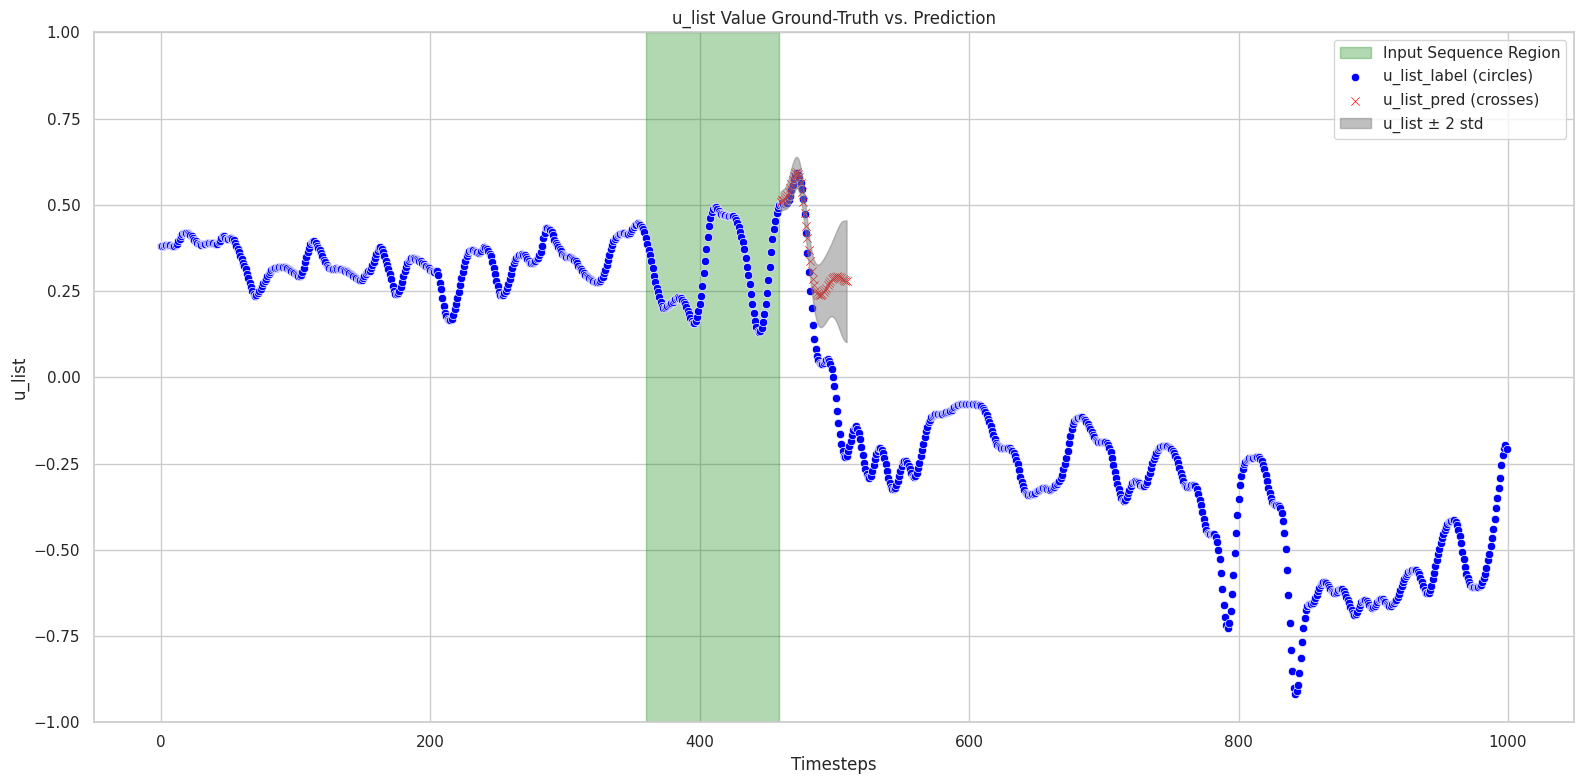

3096it [00:20, 5095.28it/s, single_test_loss=1.730706]

tensor(0.3543)
tensor(0.4444)
tensor(0.3839)
tensor(0.5206)
tensor(0.3242)


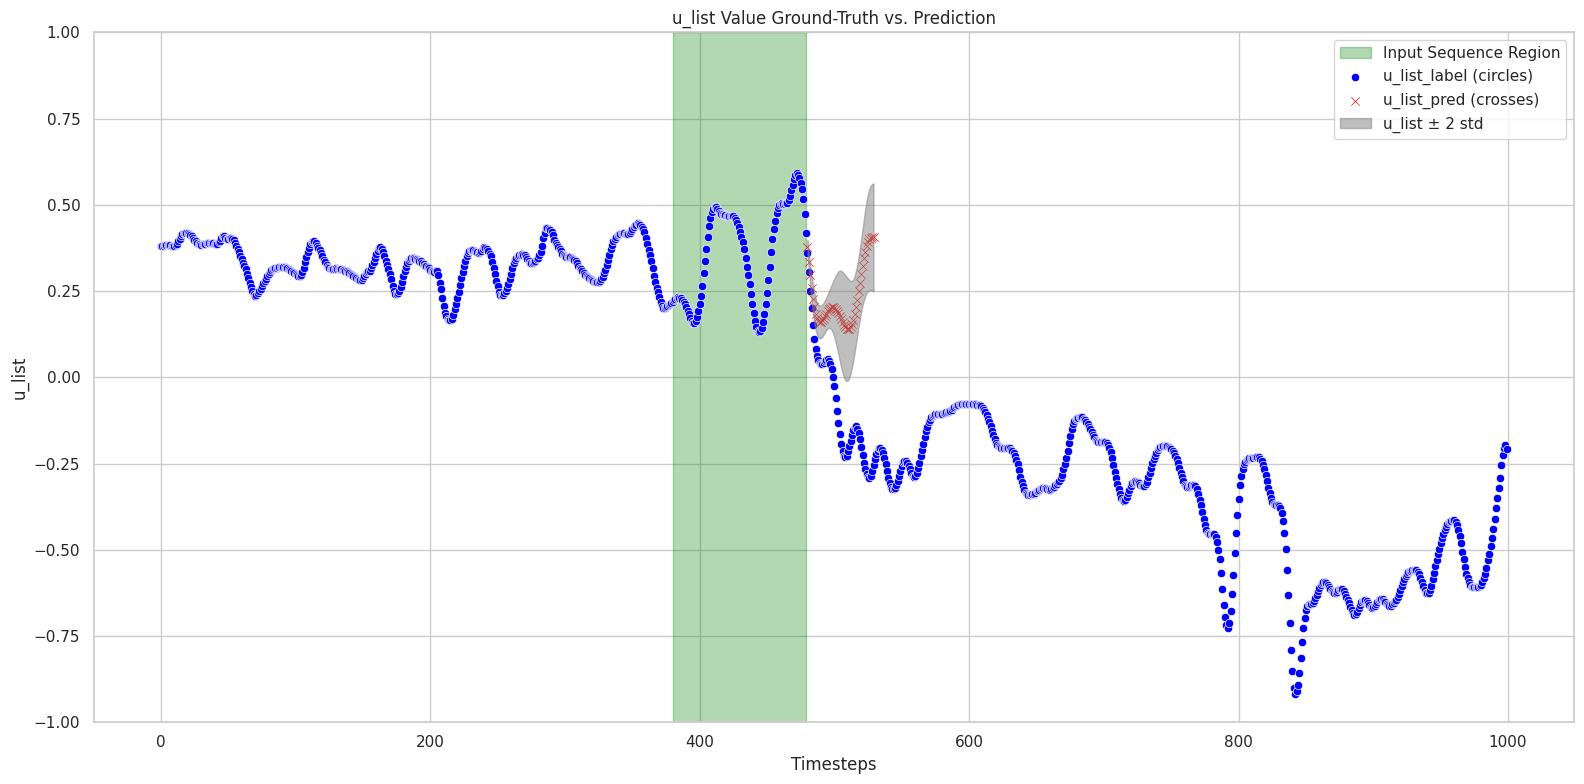

3331it [00:21, 66.51it/s, single_test_loss=0.156723]  

tensor(-0.0219)
tensor(-0.2998)
tensor(-0.1501)
tensor(-0.2412)
tensor(-0.3070)


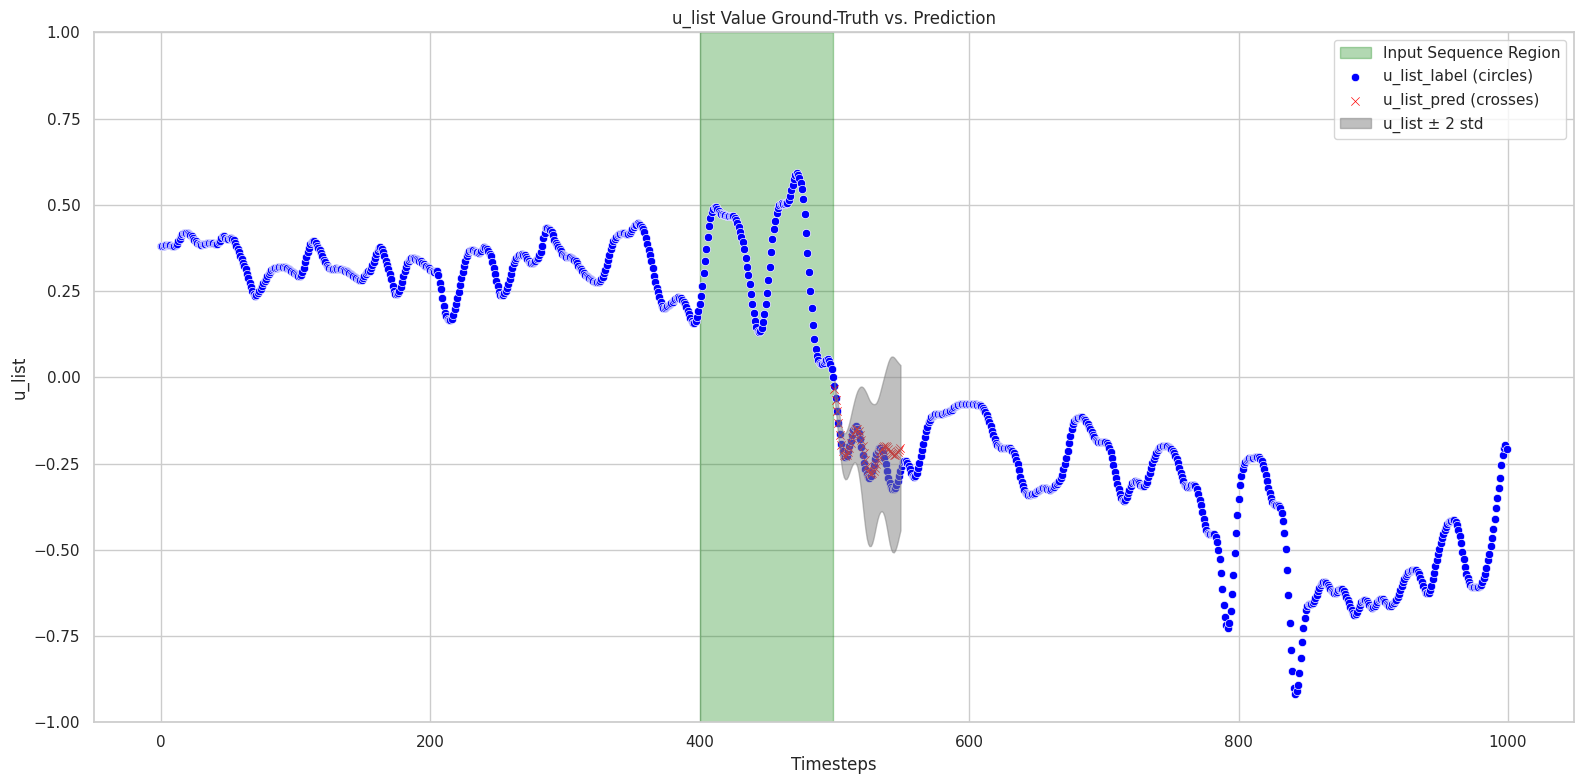

3331it [00:22, 66.51it/s, single_test_loss=0.064954]

tensor(-0.2044)
tensor(-0.3093)
tensor(-0.2998)
tensor(-0.2493)
tensor(-0.2498)


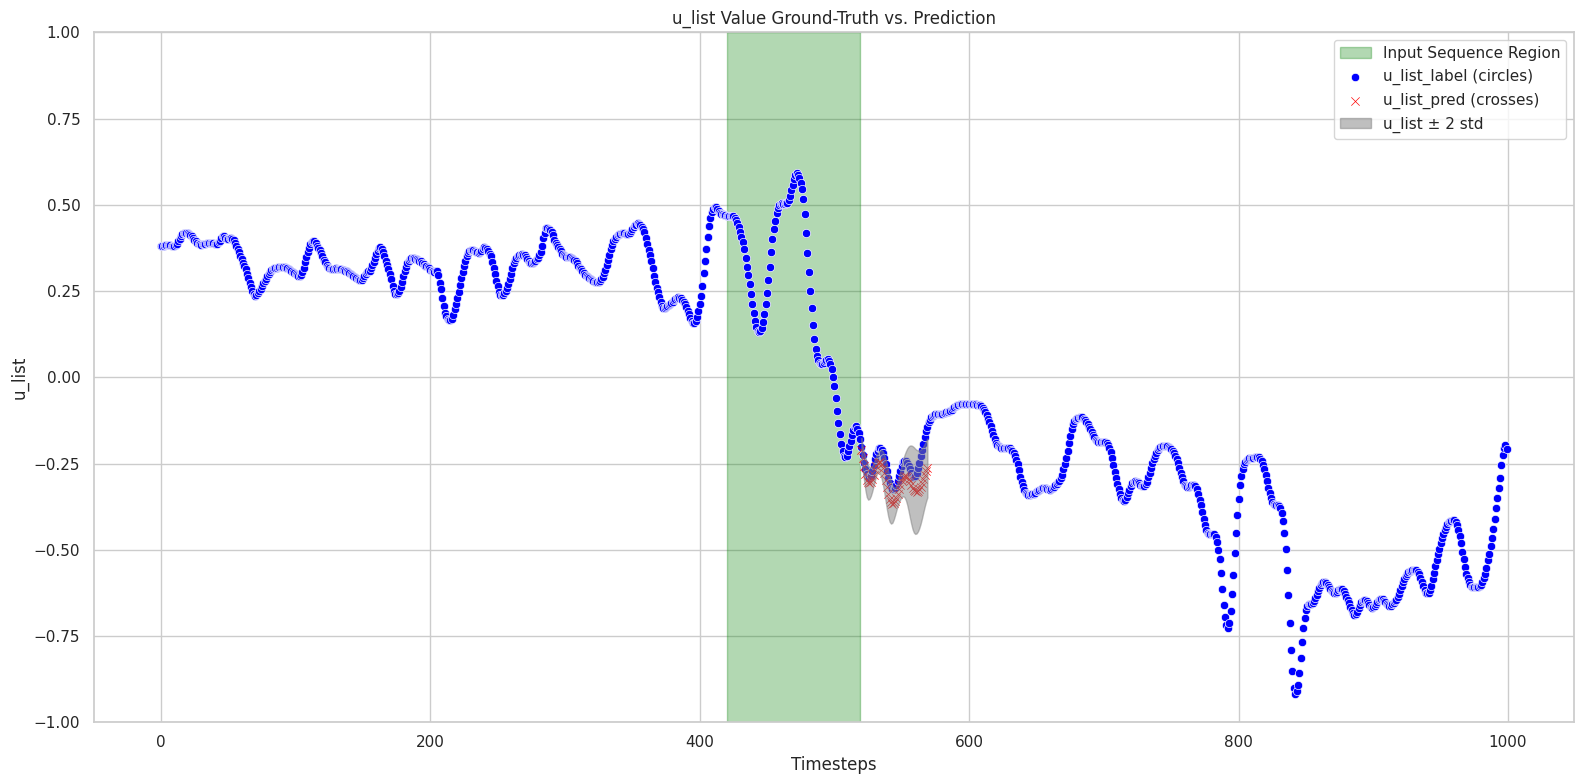

3333it [00:23, 58.78it/s, single_test_loss=0.187688]

tensor(-0.1314)
tensor(-0.1519)
tensor(-0.1680)
tensor(-0.1429)
tensor(-0.2634)


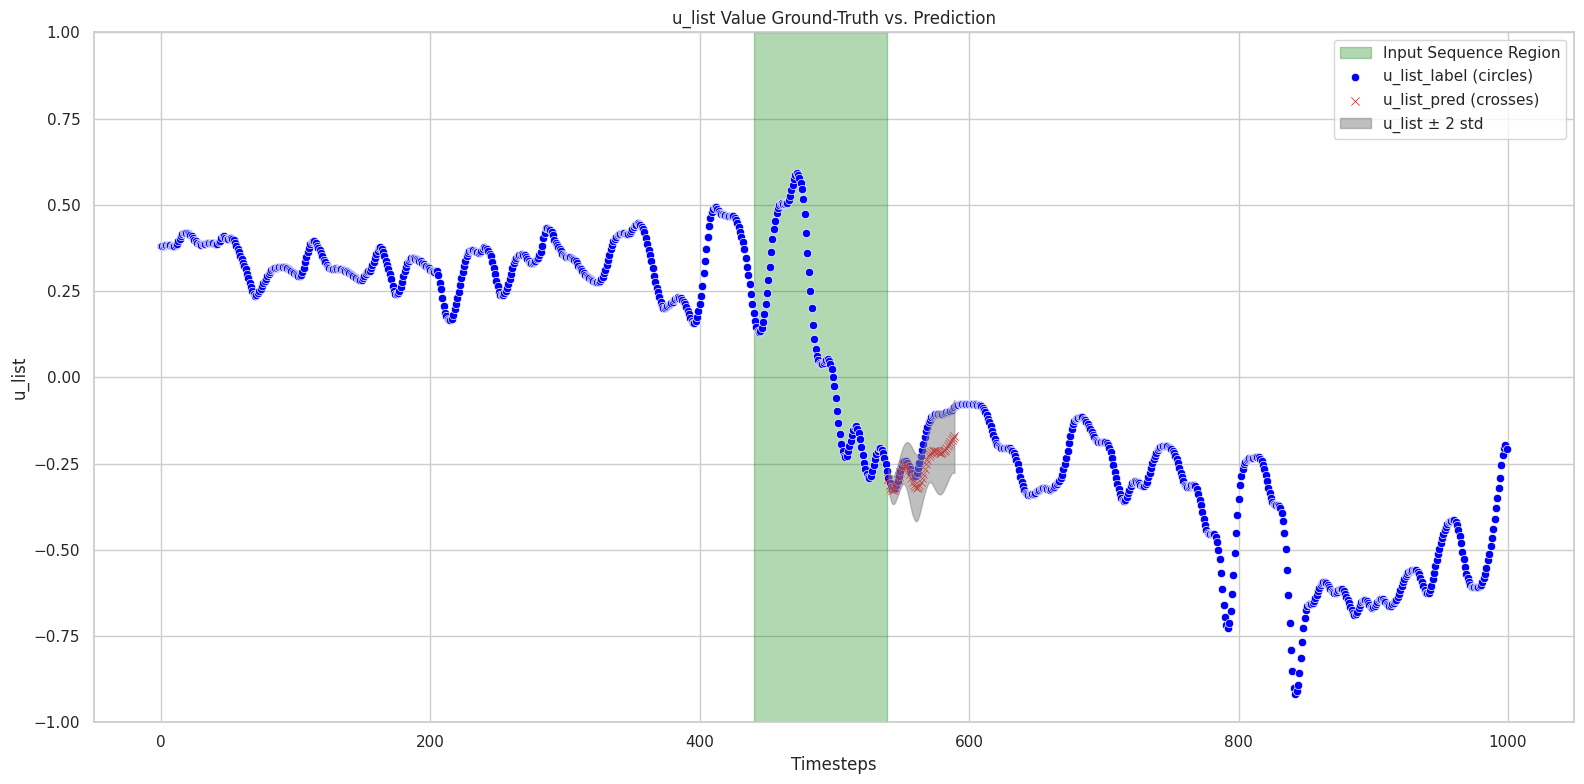

3333it [00:24, 58.78it/s, single_test_loss=0.337479]

tensor(-0.1062)
tensor(-0.0985)
tensor(-0.1333)
tensor(-0.1111)
tensor(-0.2266)


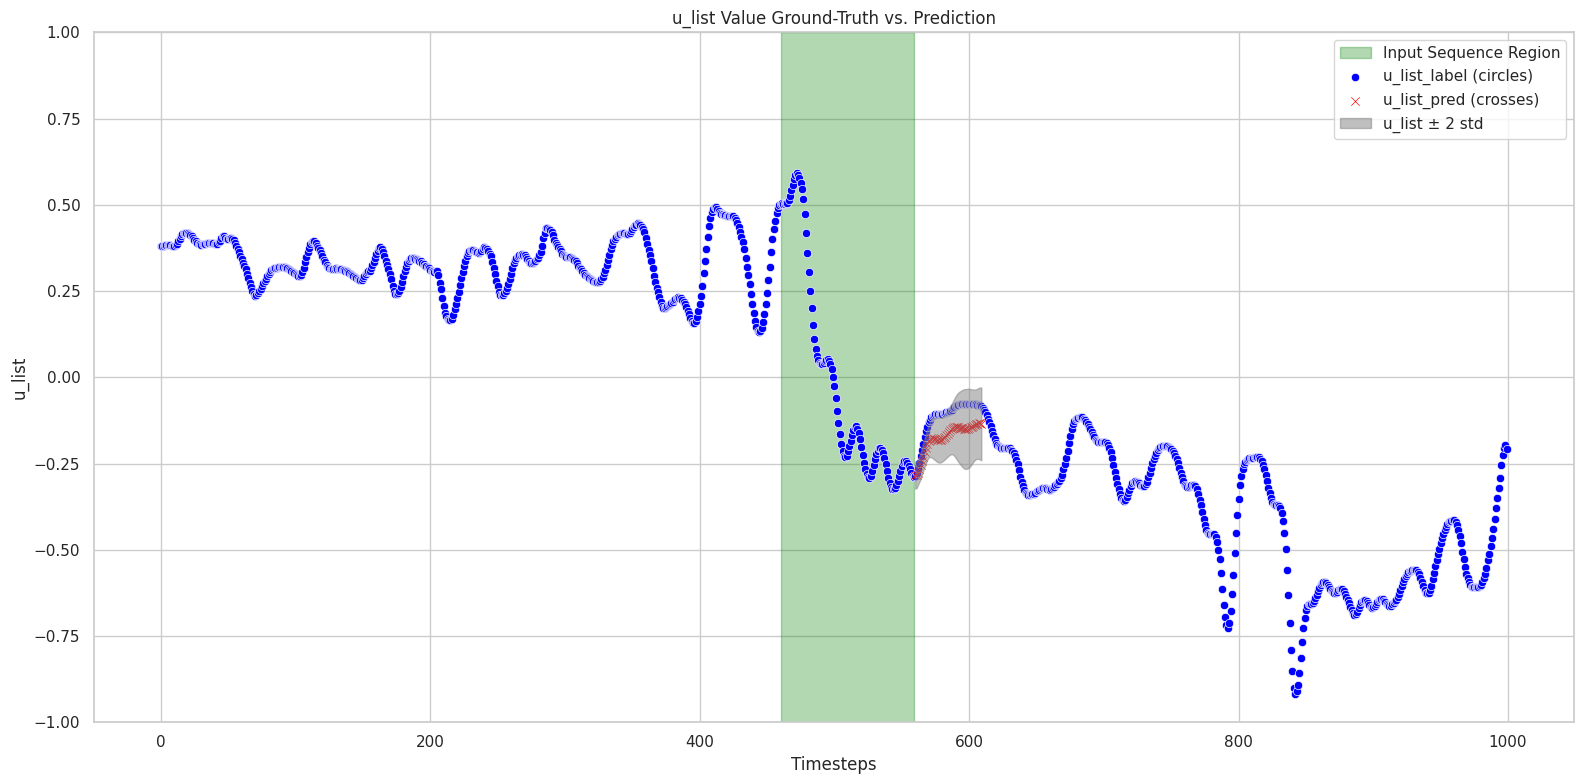

3333it [00:25, 58.78it/s, single_test_loss=0.366357]

tensor(-0.0743)
tensor(-0.0506)
tensor(-0.0383)
tensor(-0.0701)
tensor(-0.1907)


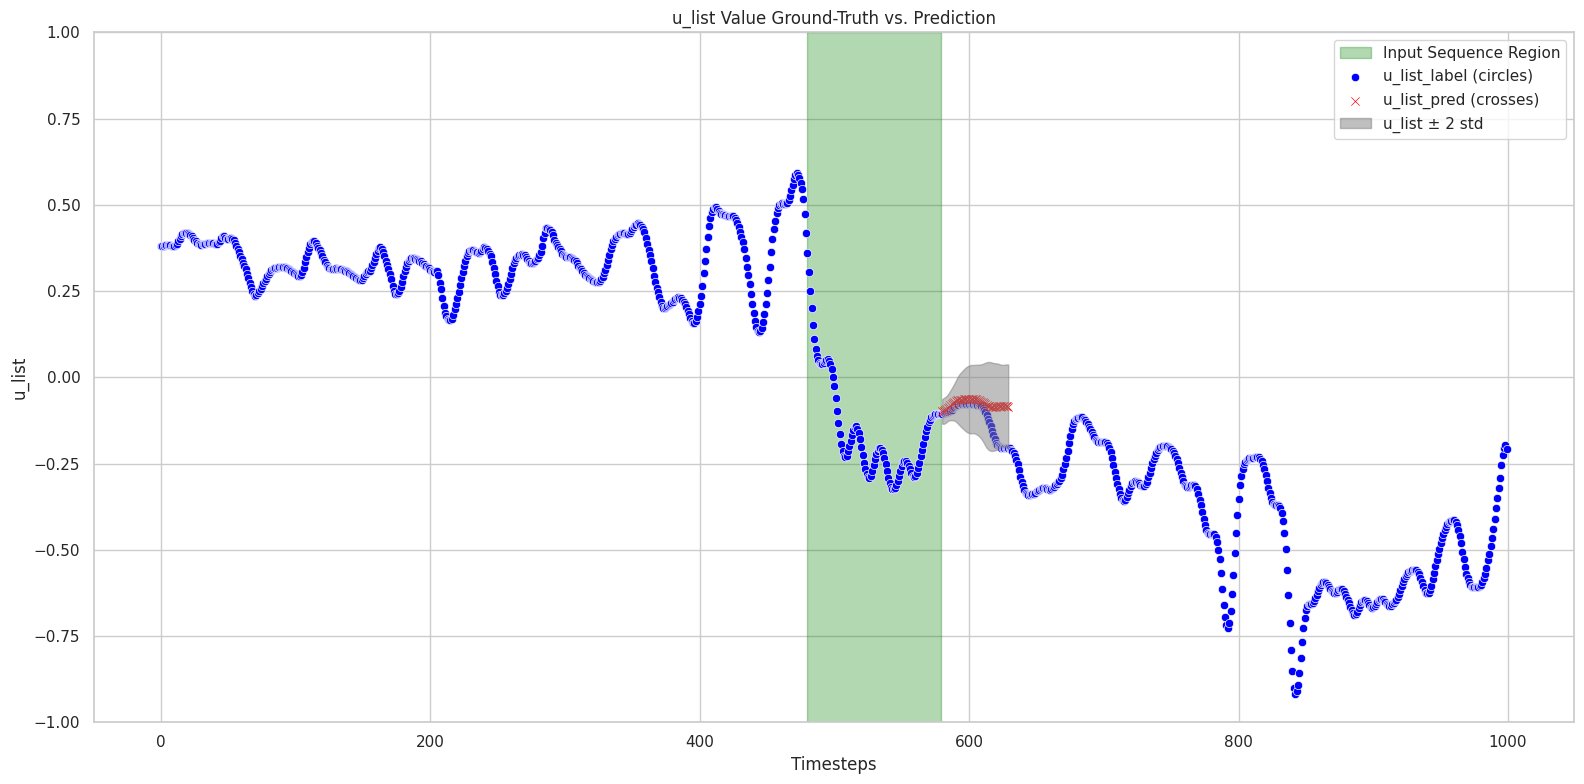

3333it [00:26, 58.78it/s, single_test_loss=0.428048]

tensor(-0.1151)
tensor(-0.1145)
tensor(-0.1574)
tensor(-0.1159)
tensor(-0.1928)


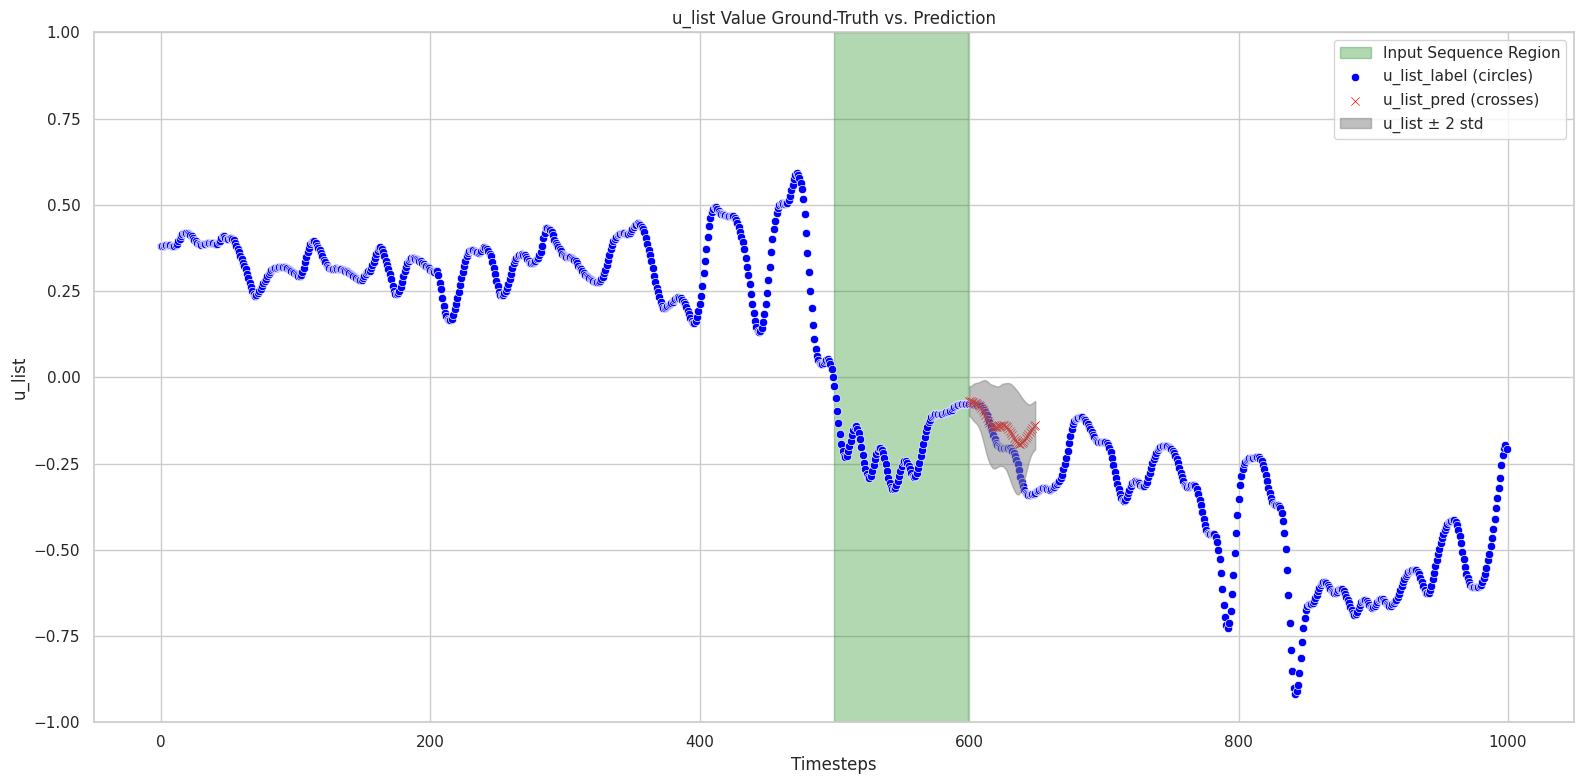

3333it [00:27, 58.78it/s, single_test_loss=0.200889]

tensor(-0.1580)
tensor(-0.1725)
tensor(-0.1641)
tensor(-0.1135)
tensor(-0.2010)


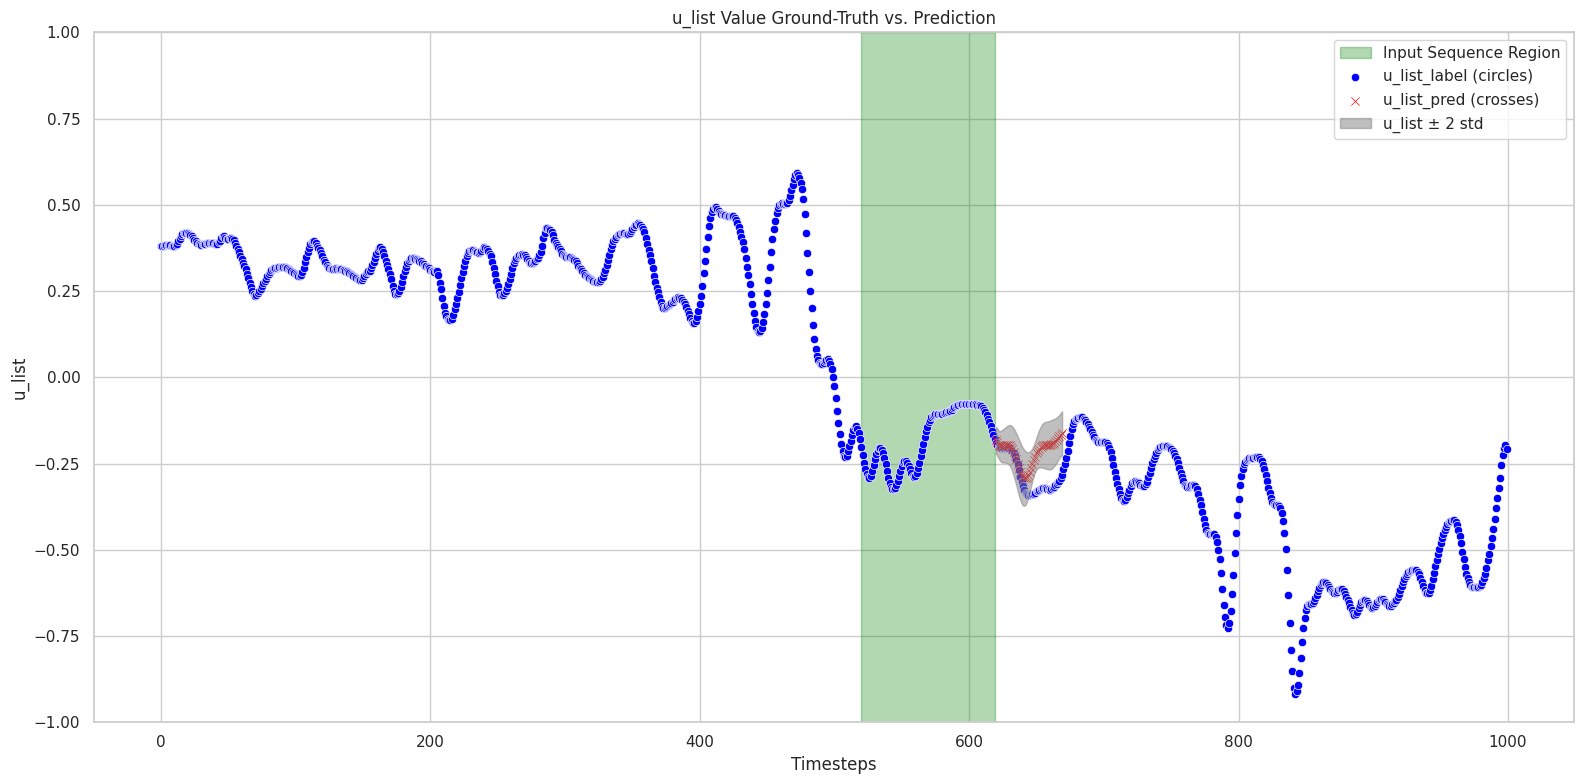

3333it [00:28, 58.78it/s, single_test_loss=0.228350]

tensor(-0.1853)
tensor(-0.1313)
tensor(-0.1511)
tensor(-0.1542)
tensor(-0.2602)


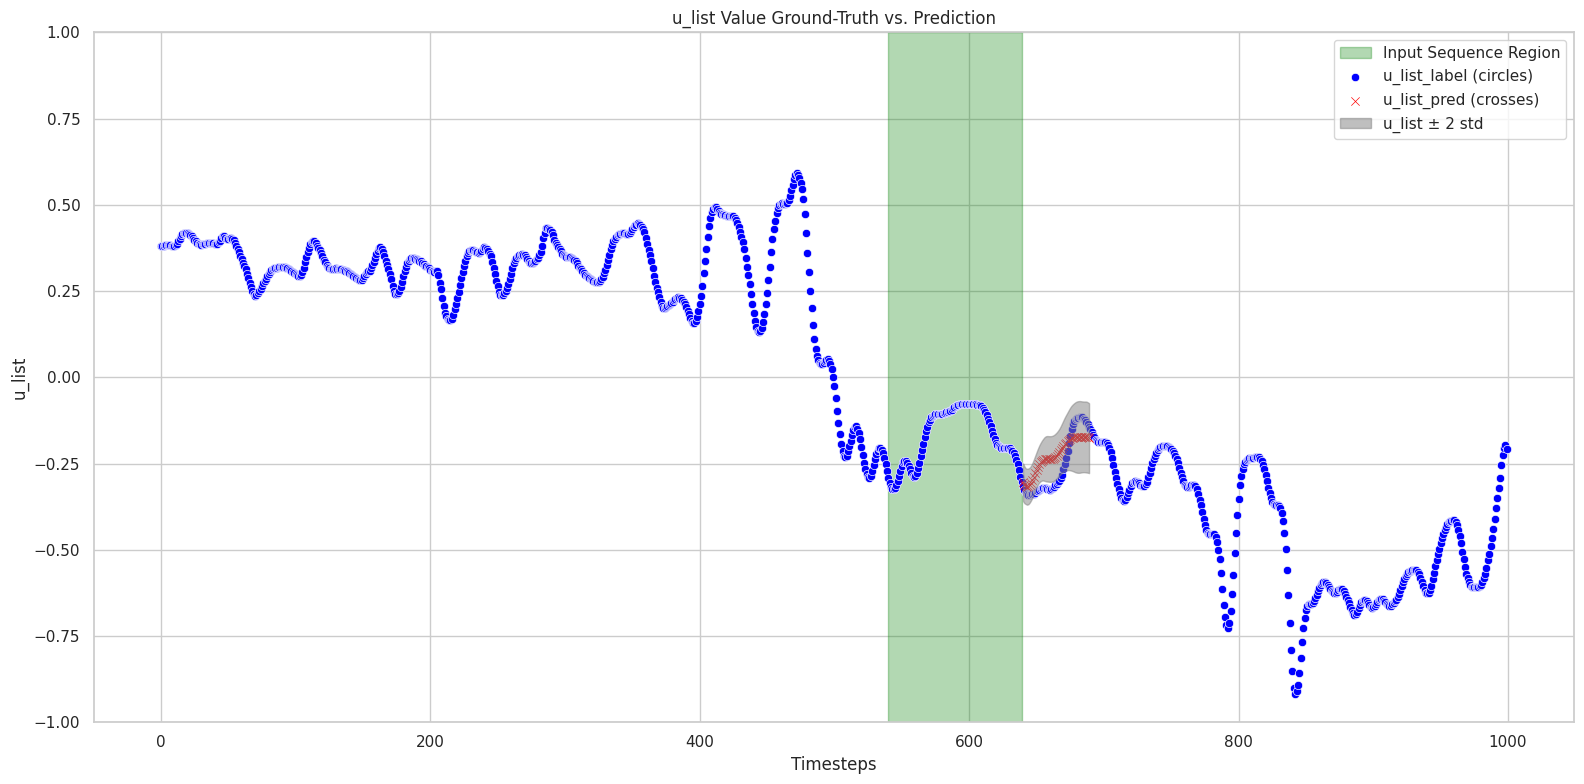

3333it [00:29, 58.78it/s, single_test_loss=0.206384]

tensor(-0.2054)
tensor(-0.1771)
tensor(-0.1590)
tensor(-0.1805)
tensor(-0.2732)


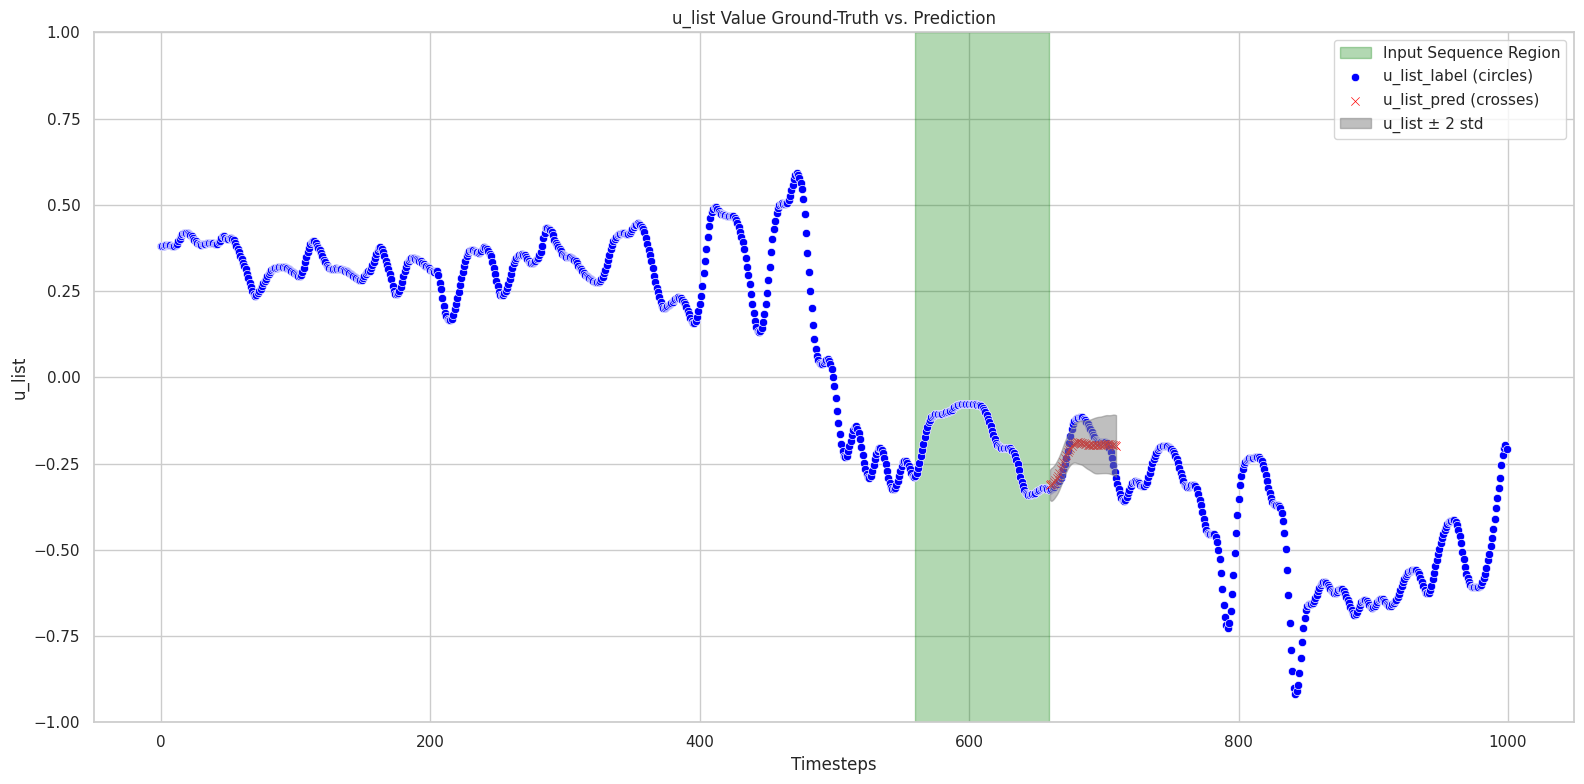

3333it [00:30, 58.78it/s, single_test_loss=0.300037]

tensor(-0.2055)
tensor(-0.2339)
tensor(-0.2063)
tensor(-0.1812)
tensor(-0.2816)


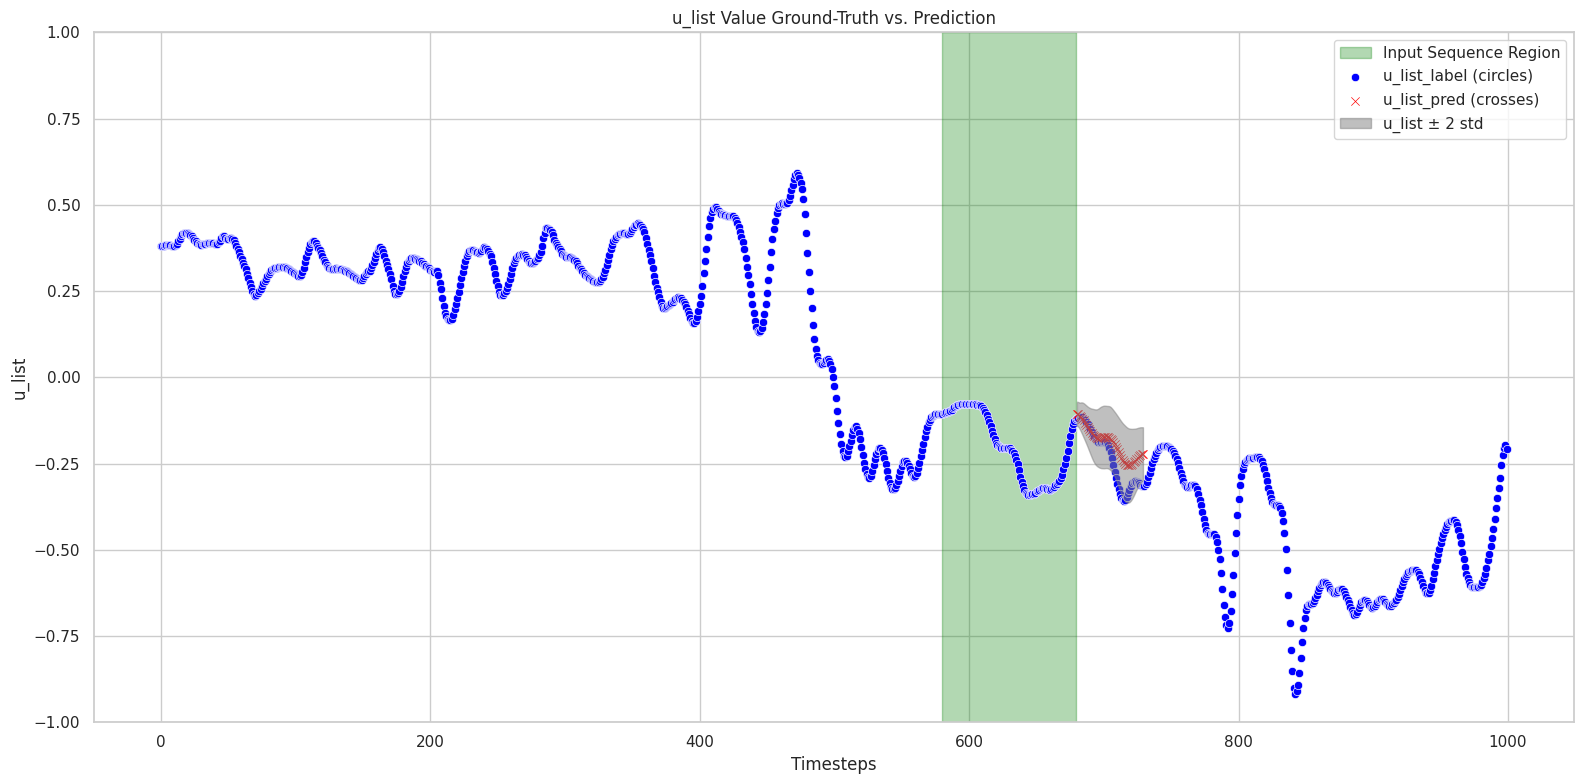

3333it [00:31, 58.78it/s, single_test_loss=0.413149]

tensor(-0.2069)
tensor(-0.1941)
tensor(-0.1430)
tensor(-0.1516)
tensor(-0.2664)


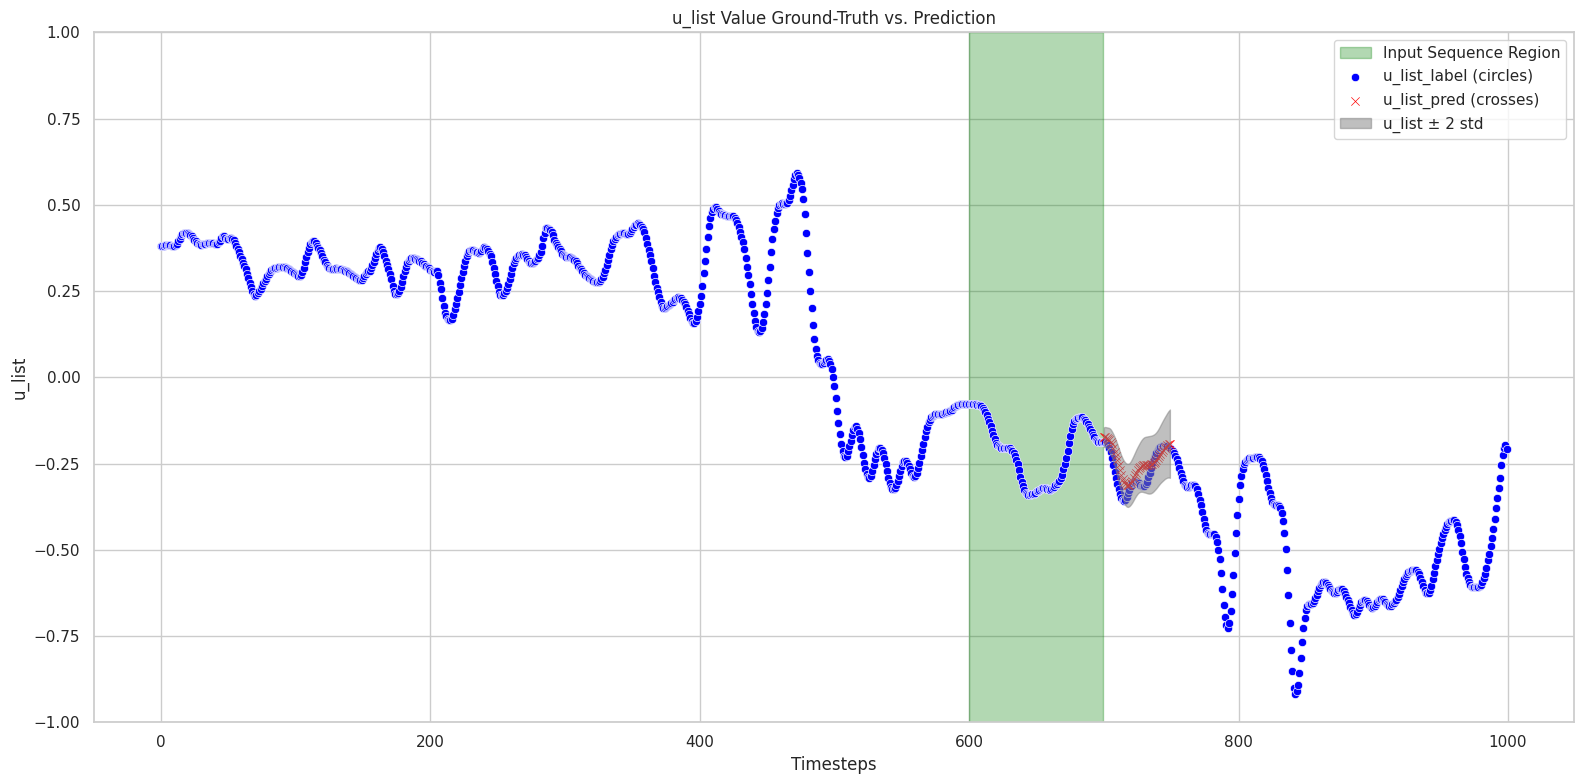

3333it [00:32, 58.78it/s, single_test_loss=0.274096]

tensor(-0.2361)
tensor(-0.2509)
tensor(-0.2551)
tensor(-0.2252)
tensor(-0.3238)


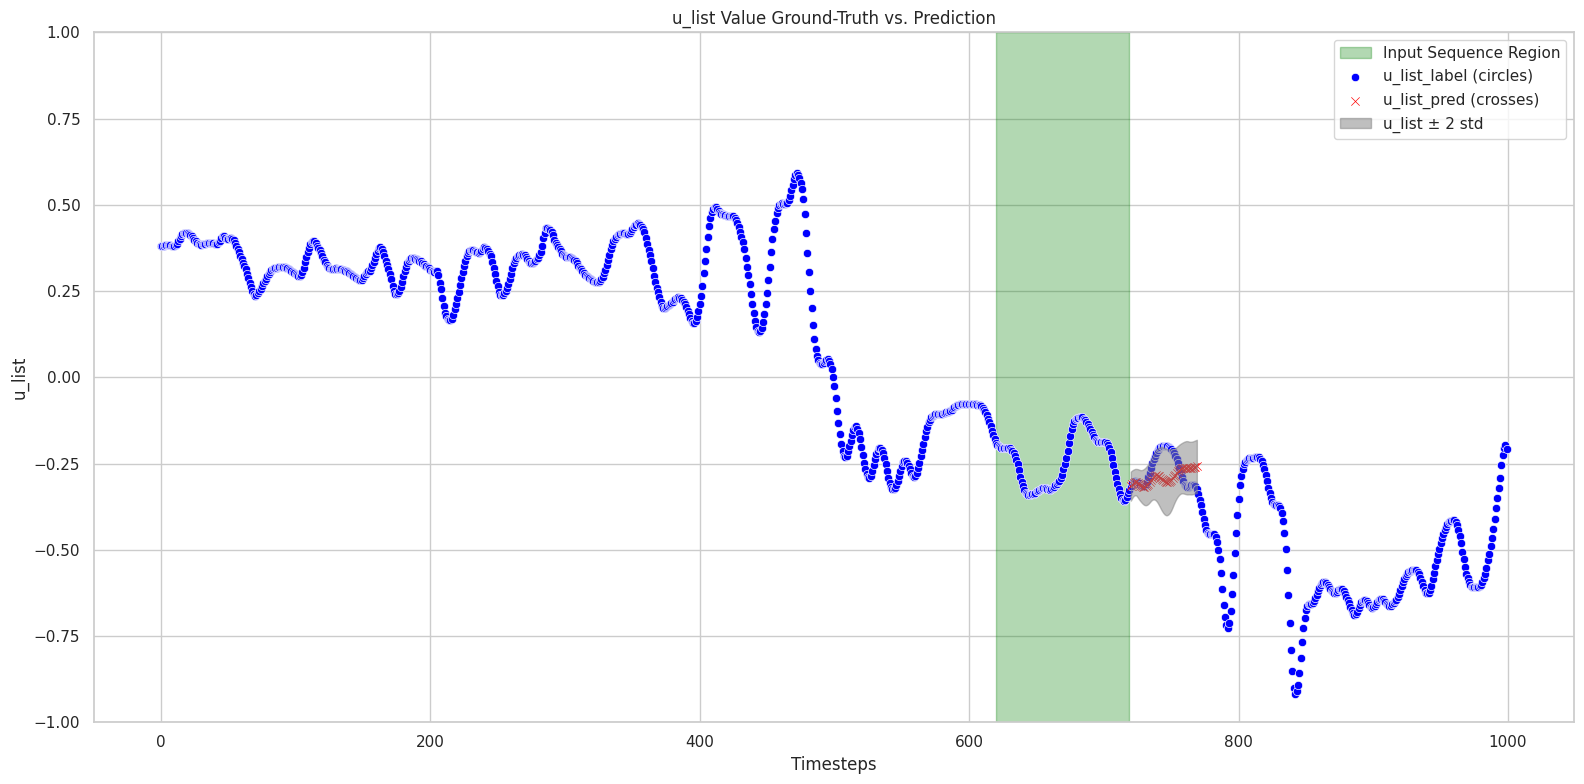

3333it [00:33, 58.78it/s, single_test_loss=0.812792]

tensor(-0.2451)
tensor(-0.2427)
tensor(-0.2198)
tensor(-0.2071)
tensor(-0.2619)


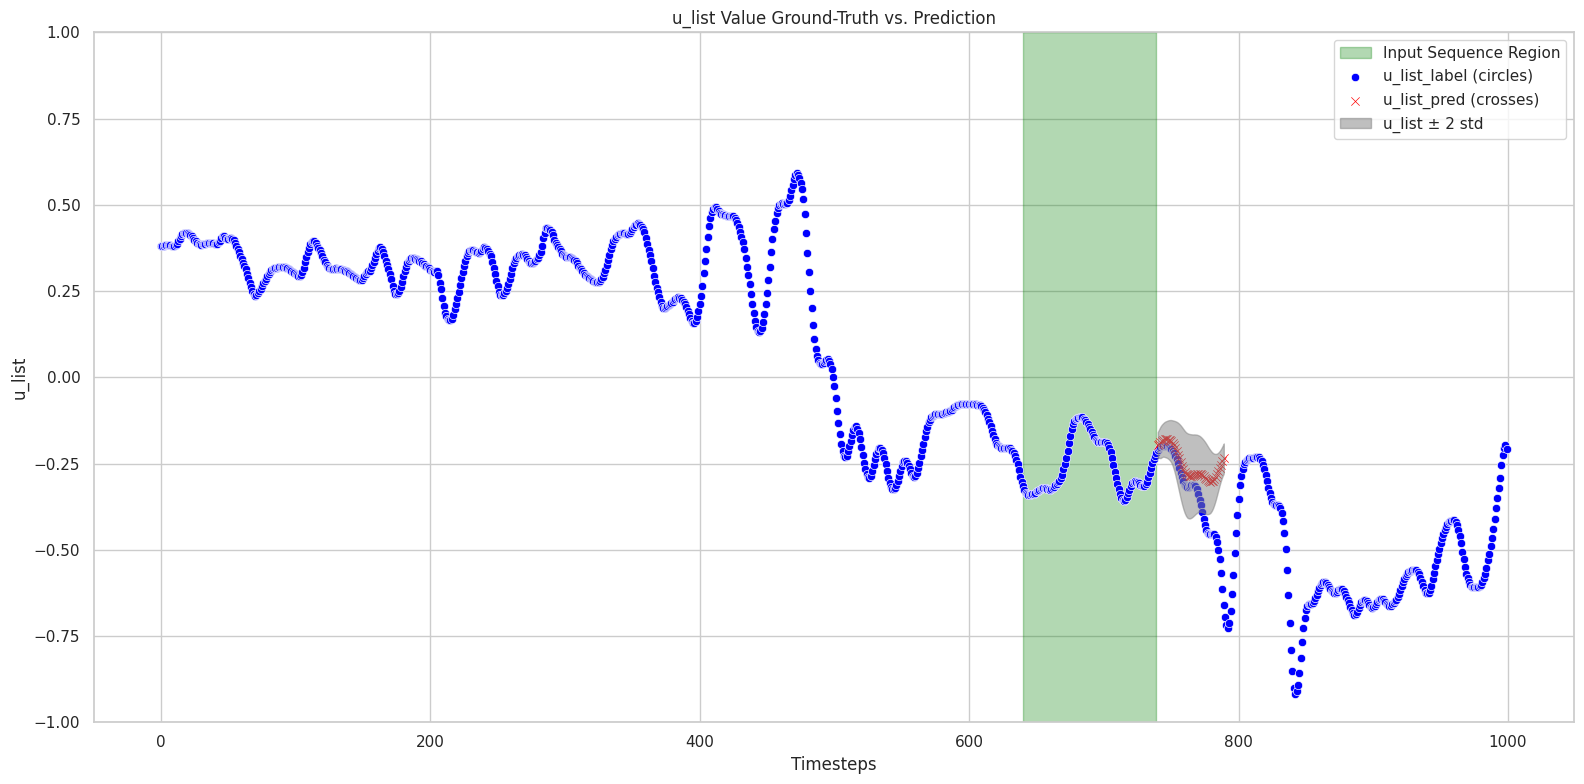

3333it [00:34, 58.78it/s, single_test_loss=2.002507]

tensor(-0.2512)
tensor(-0.1383)
tensor(-0.1721)
tensor(-0.1384)
tensor(-0.1866)


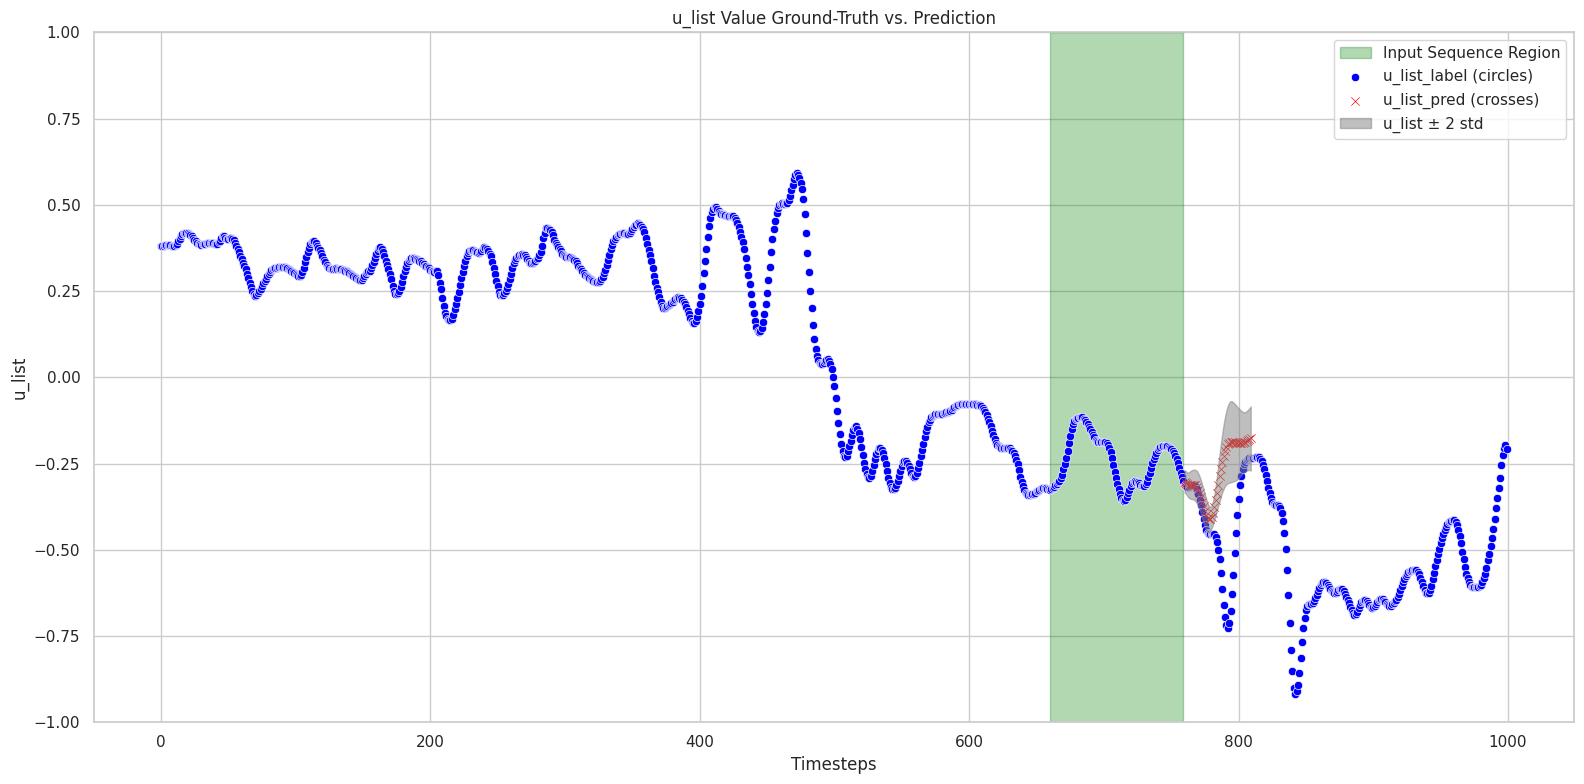

3333it [00:35, 58.78it/s, single_test_loss=0.382540]

tensor(-0.3072)
tensor(-0.1956)
tensor(-0.3598)
tensor(-0.3258)
tensor(-0.5020)


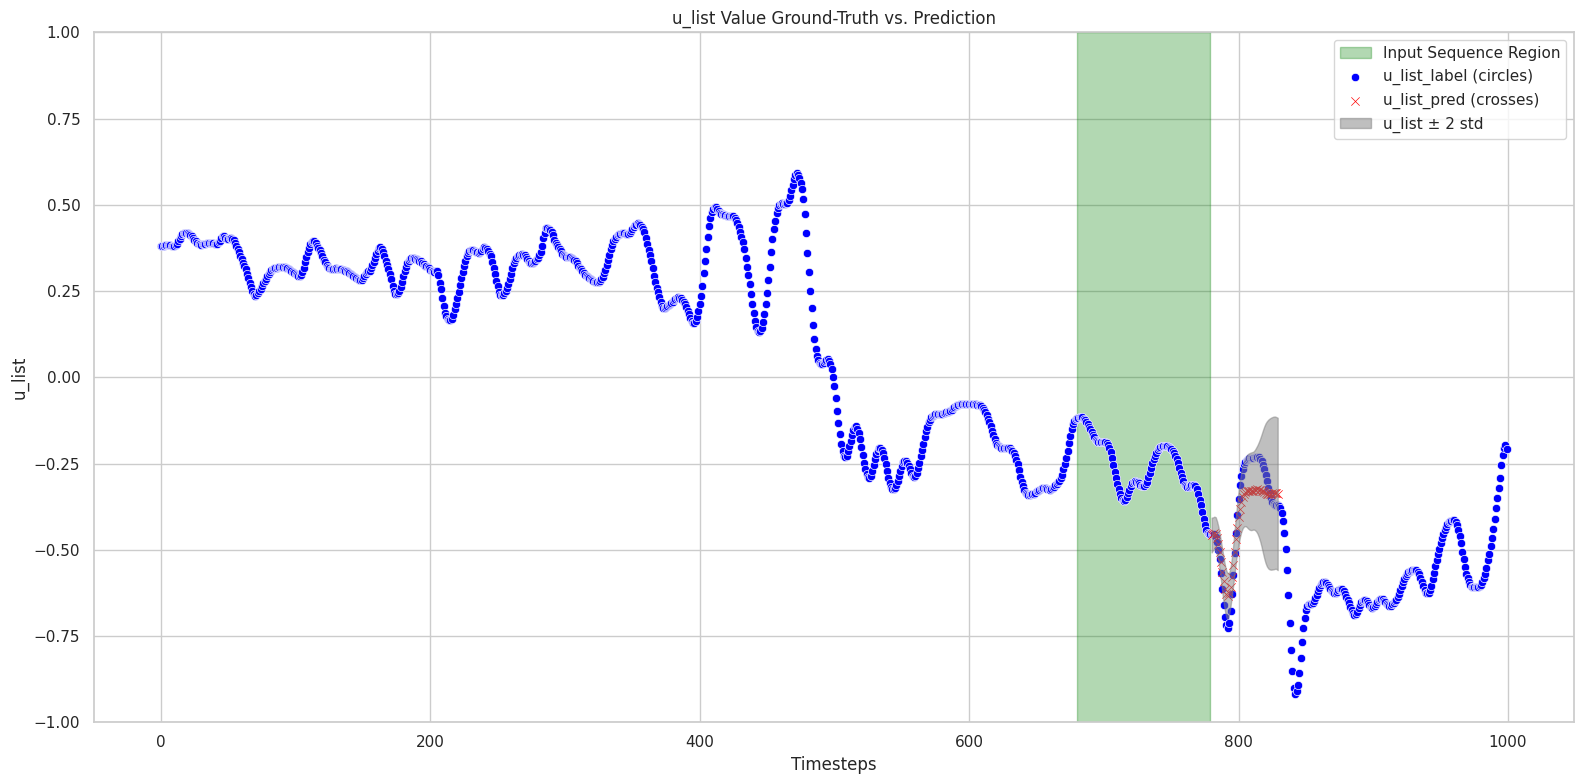

3333it [00:36, 58.78it/s, single_test_loss=0.911944]

tensor(-0.3387)
tensor(-0.3694)
tensor(-0.3467)
tensor(-0.3082)
tensor(-0.1395)


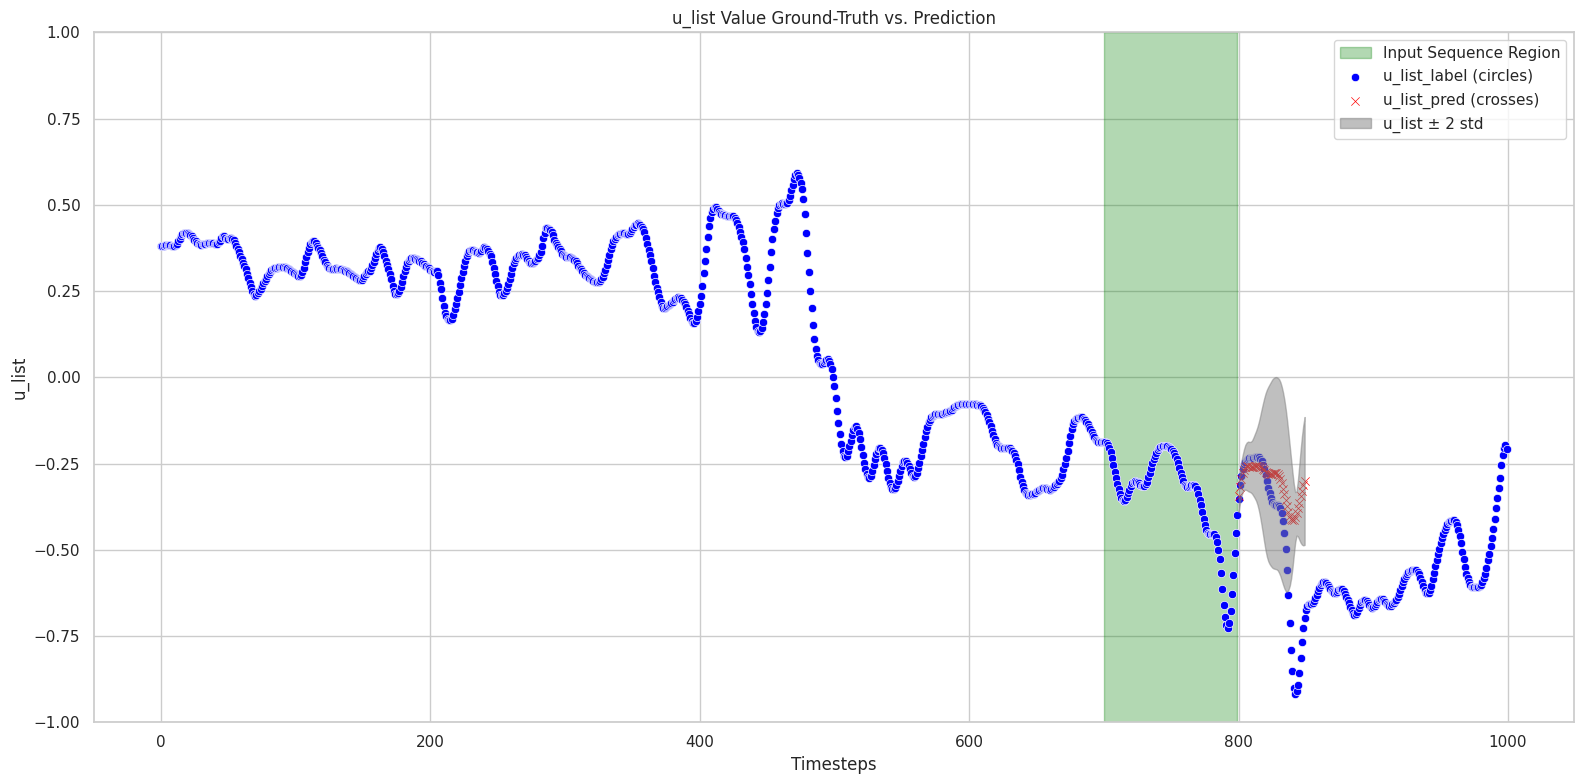

3333it [00:37, 58.78it/s, single_test_loss=0.953853]

tensor(-0.2829)
tensor(0.0657)
tensor(-0.1371)
tensor(-0.1466)
tensor(0.0301)


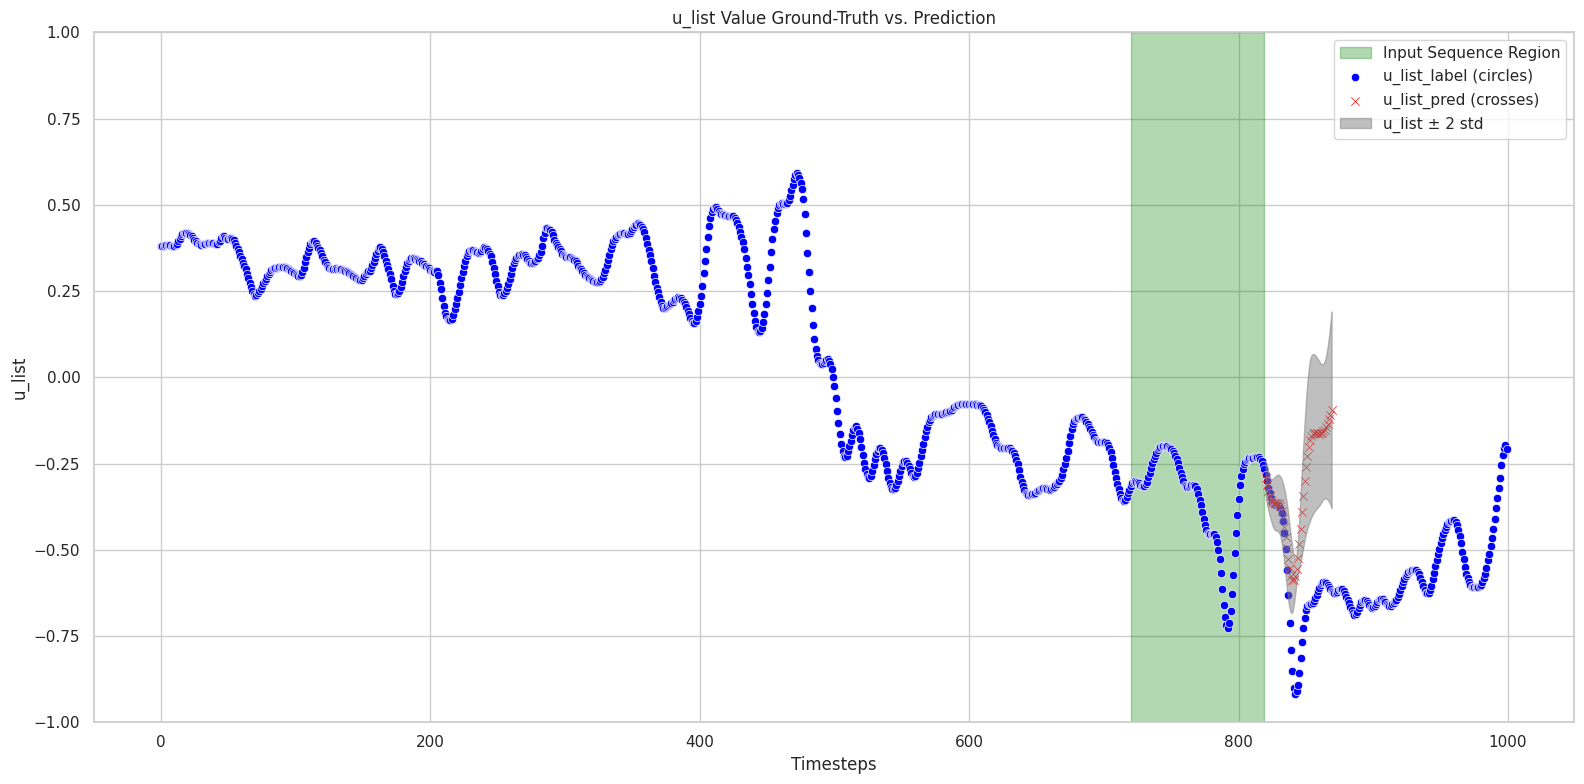

3333it [00:38, 58.78it/s, single_test_loss=0.192067]

tensor(-0.5668)
tensor(-0.6027)
tensor(-0.6605)
tensor(-0.5312)
tensor(-0.6875)


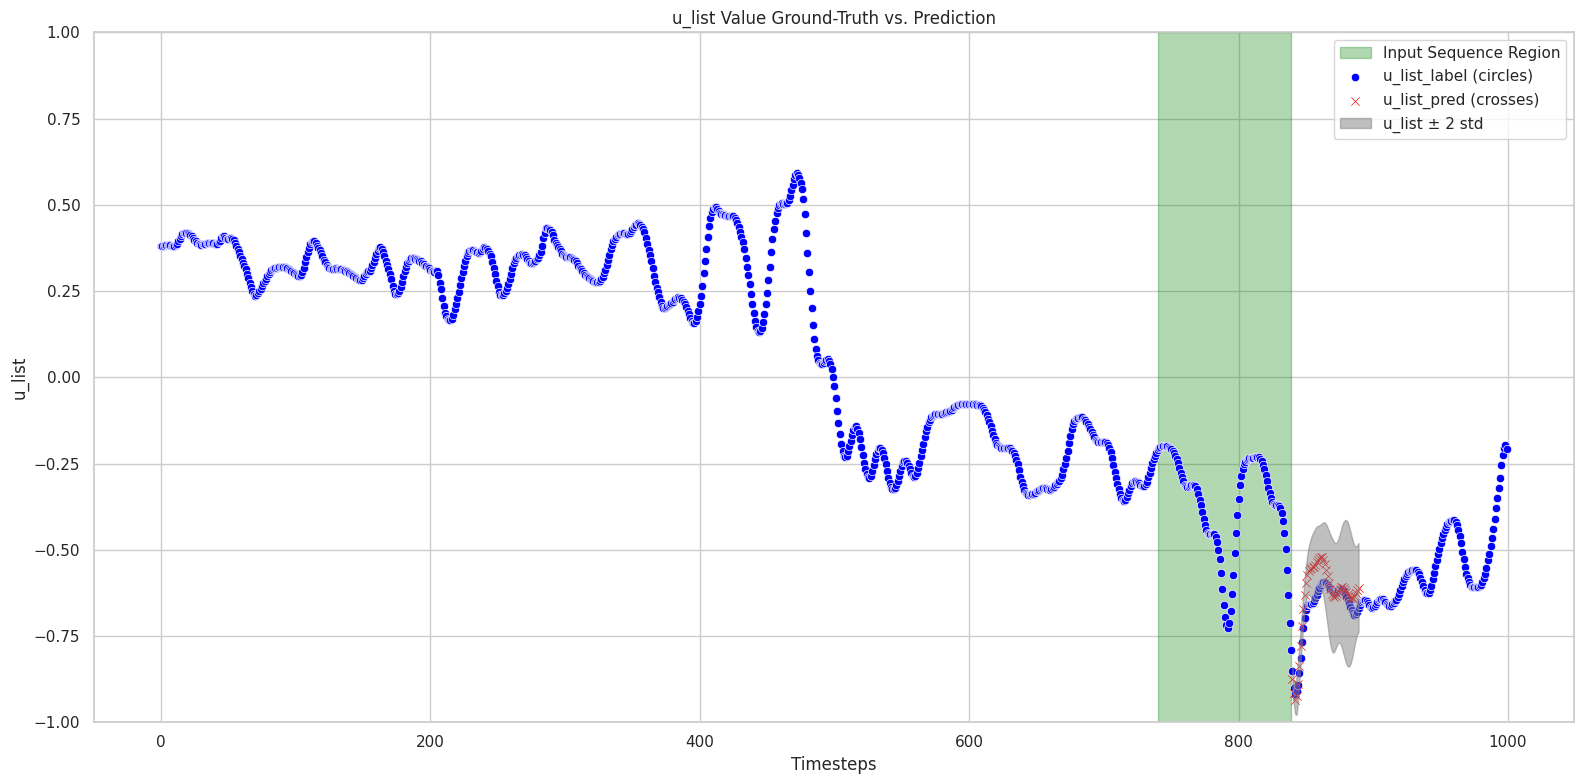

3333it [00:39, 58.78it/s, single_test_loss=0.108130]

tensor(-0.4935)
tensor(-0.4606)
tensor(-0.4735)
tensor(-0.4481)
tensor(-0.6355)


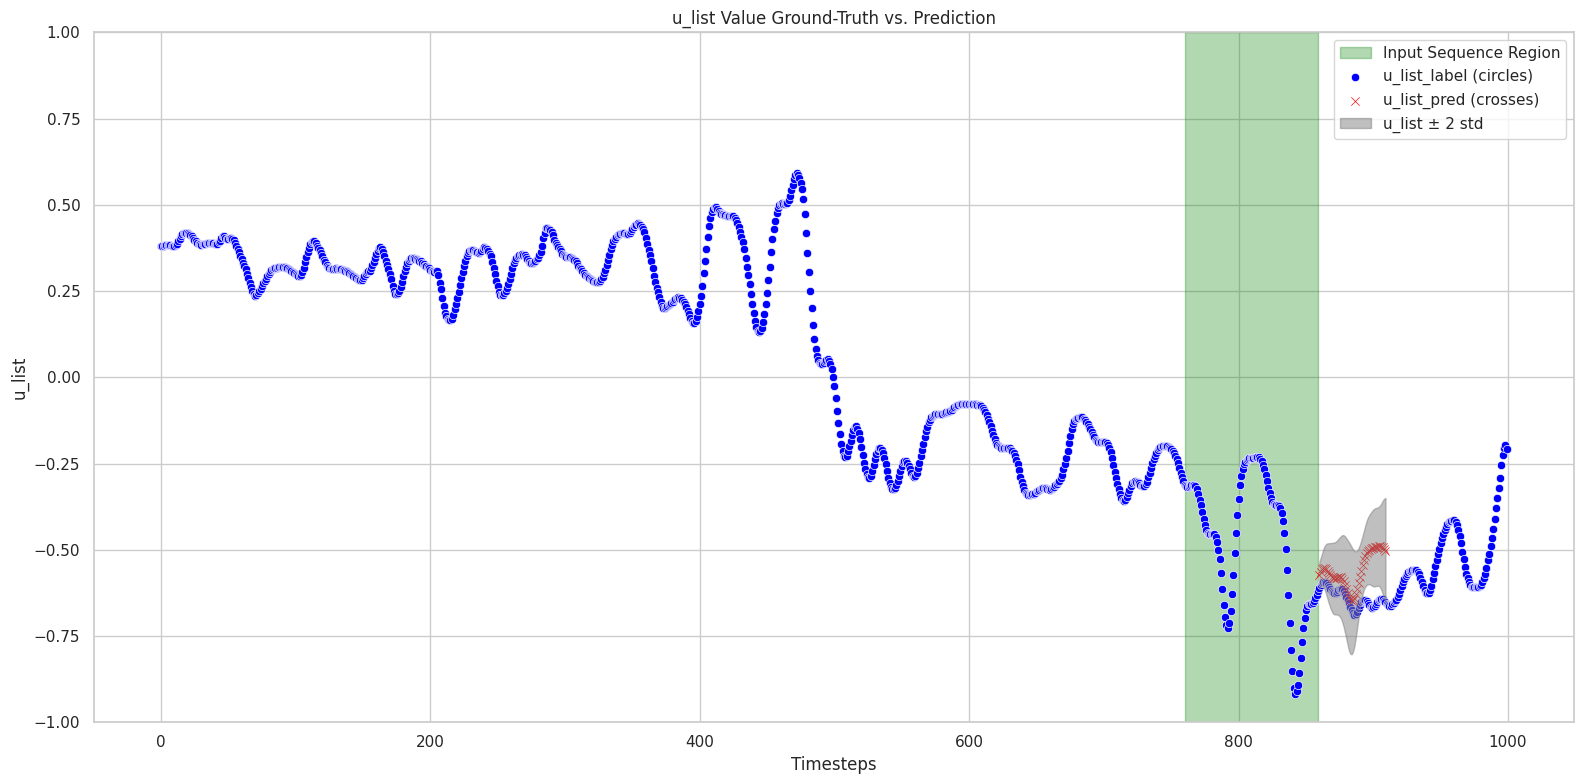

3333it [00:40, 58.78it/s, single_test_loss=0.219474]

tensor(-0.5556)
tensor(-0.5443)
tensor(-0.5723)
tensor(-0.5251)
tensor(-0.6406)


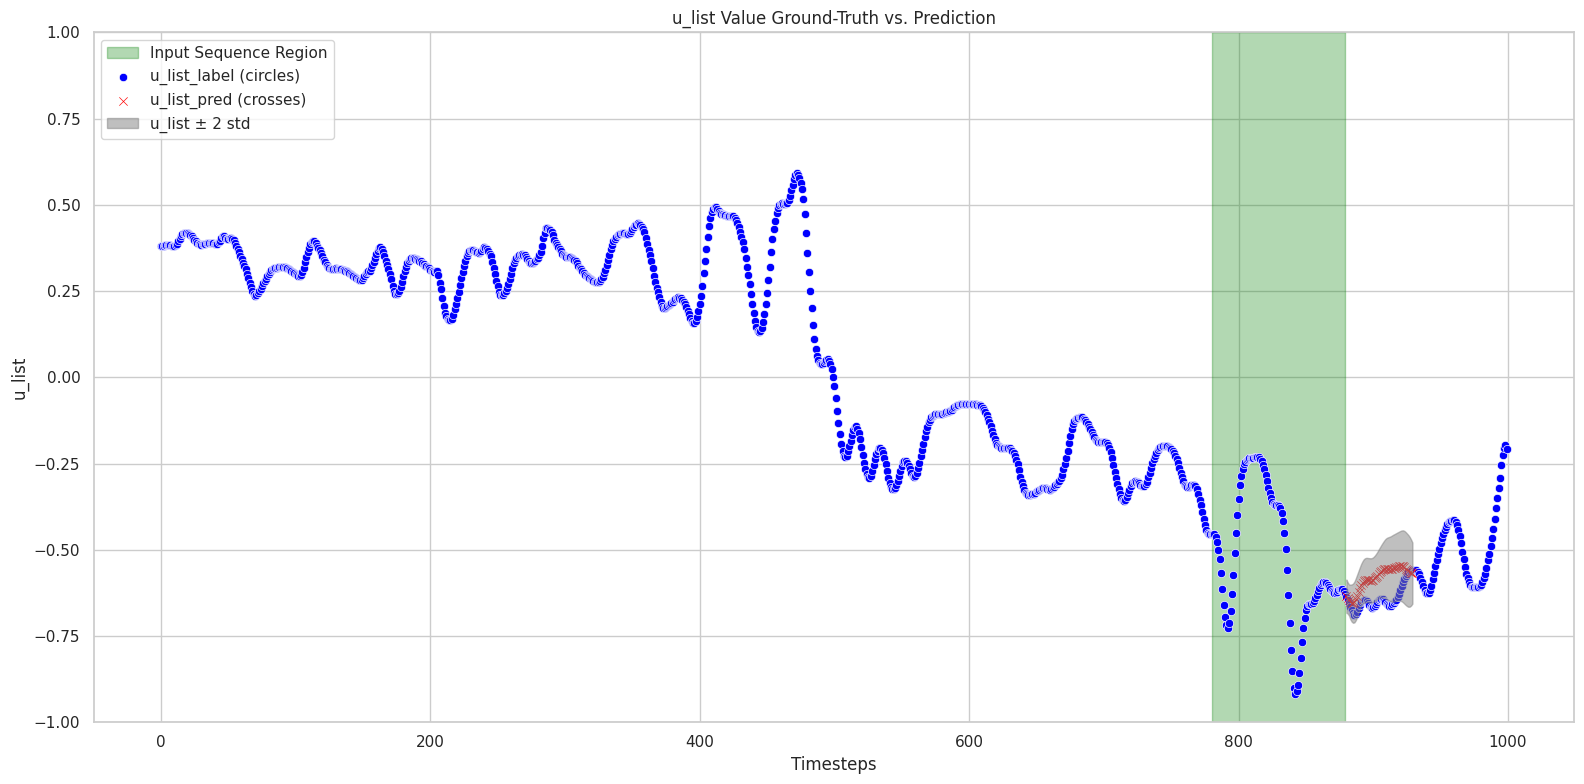

3351it [00:41, 23.62it/s, single_test_loss=0.399597]

tensor(-0.5435)
tensor(-0.5608)
tensor(-0.6005)
tensor(-0.4597)
tensor(-0.6473)


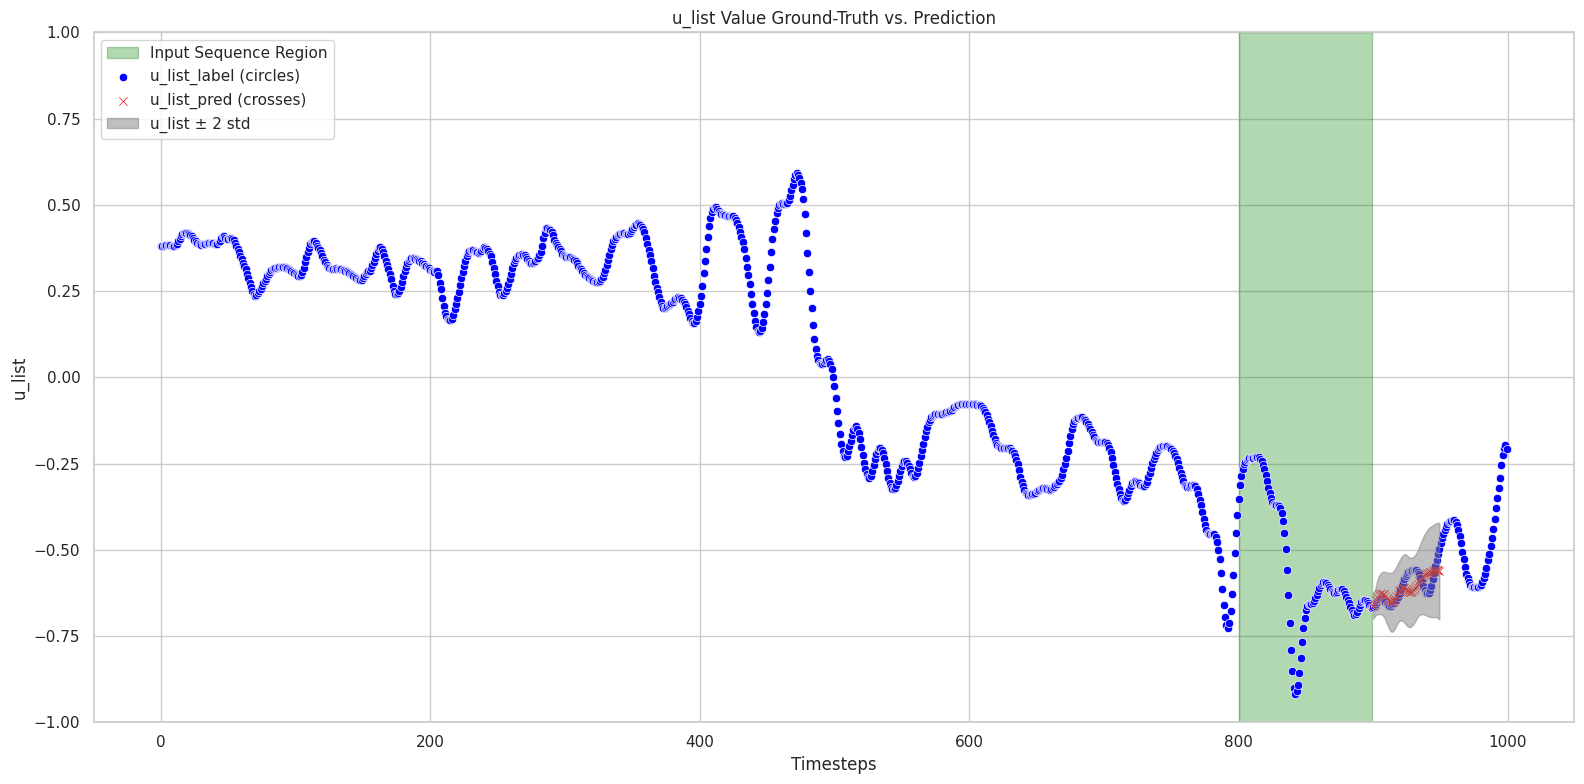

3352it [00:42, 22.48it/s, single_test_loss=0.249351]

tensor(-0.5381)
tensor(-0.5356)
tensor(-0.5327)
tensor(-0.4620)
tensor(-0.6117)


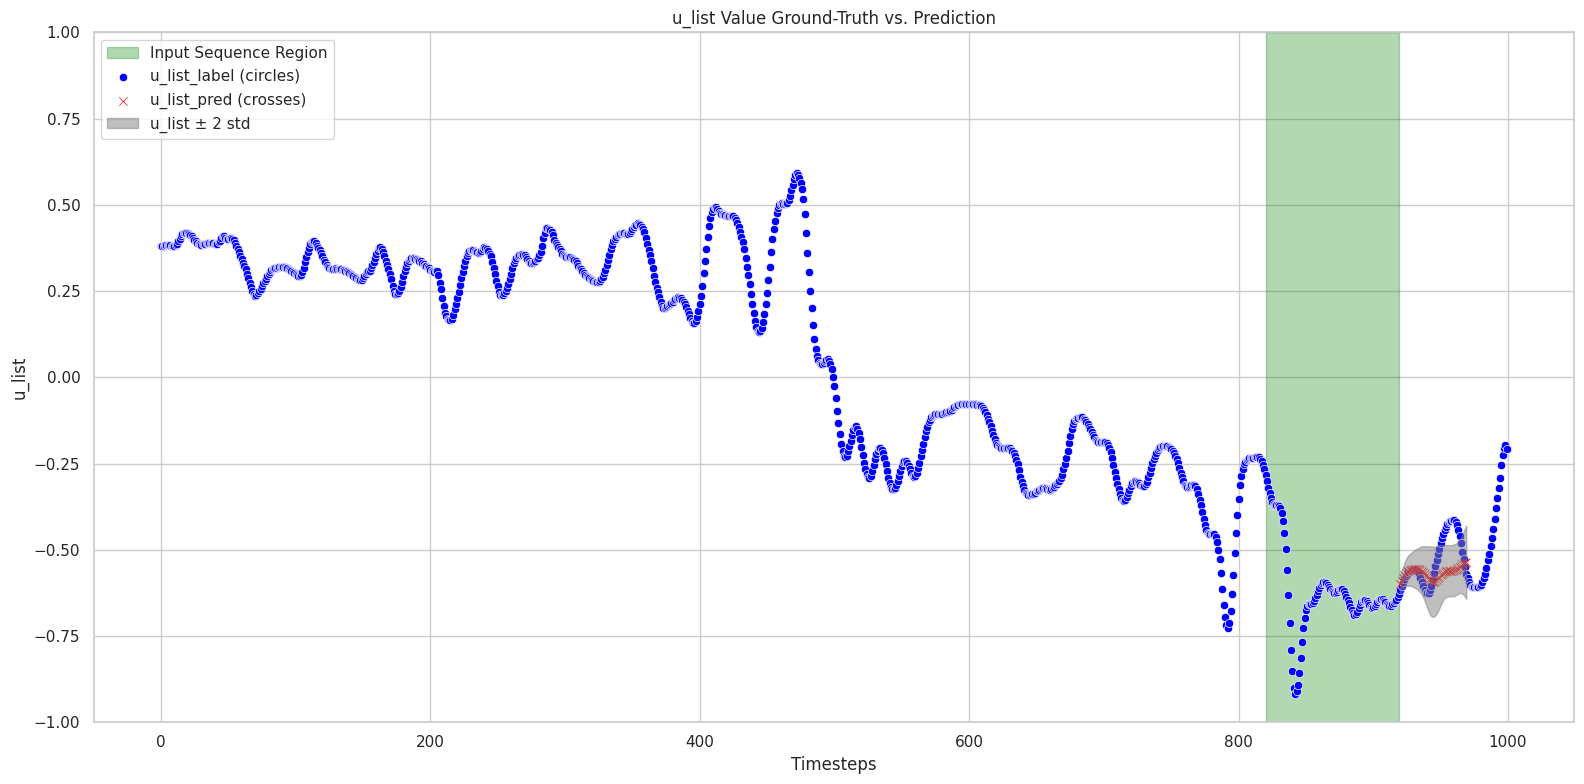

3352it [00:43, 22.48it/s, single_test_loss=0.422067]

tensor(-0.5149)
tensor(-0.5257)
tensor(-0.4937)
tensor(-0.4955)
tensor(-0.5891)


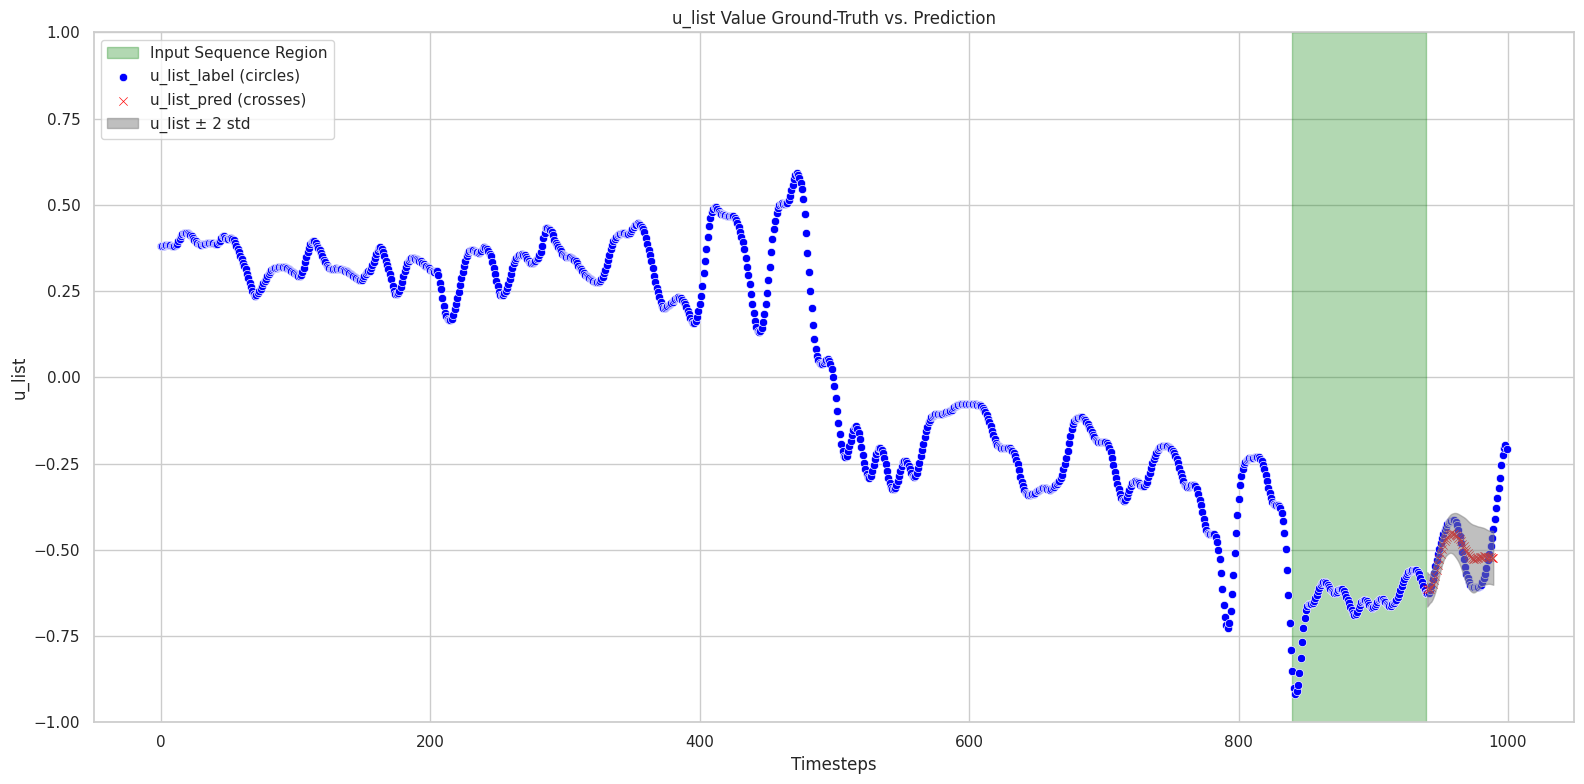

5461it [00:43, 124.90it/s, single_test_loss=0.422067]


In [6]:
# IPYWIDGETS!!!!!

test_loss = 0.0
test_progress_bar = tqdm(
    data_loader_test
)

# criterion = torch.nn.MSELoss()

num_label_features = len(label_features)

target_timeseries_idx = 77
feature = "u_list"
figure_range = 1

num_datapoints_per_timeseries = 1 + (num_single_sample_timesteps - (input_window_length + label_window_length) + 1) // window_stride

with torch.no_grad():
    for datapoint_idx, (batch_x, batch_y, x_labels) in enumerate(test_progress_bar):
        if(datapoint_idx >= target_timeseries_idx * num_datapoints_per_timeseries and datapoint_idx < (target_timeseries_idx + 1) * num_datapoints_per_timeseries):
            window_idx = datapoint_idx % num_datapoints_per_timeseries

            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            x = list(range(num_single_sample_timesteps))

            feature_idx = label_features.index(feature)
            feature_label = batch_y[0, :, feature_idx].cpu()

            all_preds = torch.zeros((len(model_paths),) + batch_y.shape)

            for i, path in enumerate(model_paths):
                criterion = torch.nn.MSELoss()
                model = torch.load(path, weights_only = False).to(device)
                model.eval()

                preds = autoregress(
                    model = model,
                    batch_x = batch_x,
                    batch_y = batch_y,
                    device = device,
                    extract_attention = True
                )

                loss = criterion(preds, batch_y)
                test_progress_bar.set_postfix({
                    "single_test_loss": f"{loss.item():.6f}"
                })

                all_preds[i, :, :, :] = preds

                del model
                torch.cuda.empty_cache()


            feature_pred = all_preds[:, 0, :, feature_idx].cpu()
            feature_x_labels = x_labels[0, :, feature_idx]
        
            feature_label = (feature_label * output_stats[window_idx, f"{feature}_std"]) + output_stats[window_idx, f"{feature}_mean"]
            feature_pred = (feature_pred * output_stats[window_idx, f"{feature}_std"]) + output_stats[window_idx, f"{feature}_mean"]
            # No normalization on x_labels in WindowedIterableDataset!

            mean_feature_preds = feature_pred.mean(dim = 0)
            std_feature_preds = feature_pred.std(dim = 0)

            print(feature_pred[0, -1])
            print(feature_pred[1, -1])
            print(feature_pred[2, -1])
            print(feature_pred[3, -1])
            print(feature_pred[4, -1])


            sns.set_theme(style = "whitegrid")
            fig, ax = plt.subplots(figsize = (16, 8))
            ax.set_ylim(-figure_range, figure_range)

            # Input region
            ax.axvspan(
                x[window_idx * window_stride],
                x[window_idx * window_stride + input_window_length - 1],
                color = "green",
                alpha = 0.3,
                label = "Input Sequence Region"
            )

            # Label values
            sns.scatterplot(
                x = x,
                y = feature_x_labels,
                marker = "o",
                label = f"{feature}_label (circles)",
                color = "blue",
                ax = ax
            )

            # Pred values
            sns.scatterplot(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y = mean_feature_preds,
                marker = "x",
                label = f"{feature}_pred (crosses)",
                color = "red",
                ax = ax
            )
            ax.fill_between(
                x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
                y1 = mean_feature_preds - 2 * std_feature_preds,
                y2 = mean_feature_preds + 2 * std_feature_preds,
                color = "gray",
                alpha = 0.5,
                label = f"{feature} ± 2 std"
            )

            # sns.scatterplot(
            #     x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
            #     y = feature_pred_mean,
            #     marker = "x",
            #     label = f"{feature}_pred (crosses)",
            #     color = "red",
            #     ax = ax
            # )
            # ax.fill_between(
            #     x = x[(input_window_length + window_idx * window_stride):(input_window_length + window_idx * window_stride + label_window_length)],
            #     y1 = feature_pred_mean - 2 * feature_pred_std,
            #     y2 = feature_pred_mean + 2 * feature_pred_std,
            #     color = "gray",
            #     alpha = 0.5,
            #     label = f"{feature} ± 2 std"
            # )

            ax.set_title(f"{feature} Value Ground-Truth vs. Prediction")
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(feature)
            ax.legend()

            plt.tight_layout()
            plt.show()
            
            # avg_attn_vals = model.get_average_attention_values()

            # for i in range(20):                                      # First 20 predictions following input sequence 
            #     output_row = avg_attn_vals[i, :]
            #     top_k_indices = np.argsort(output_row)[::-1][:10]    # Top 10 highest attention input timesteps
            #     top_k_scores = output_row[top_k_indices]
            #     print(f"Output Timestep {input_window_length + window_idx * window_stride + i + 1}")
            #     print(f"    Input Timesteps {top_k_indices + (window_idx * window_stride + 1)}")
            #     print(f"    Scores {[f'{score:.5f}' for score in top_k_scores]}\n")
